In [1]:
'''Current items
- need some more data visualtion pre-model.

- GMM getting error when plotting
- GMM no analysis. Need at lease silhouette 

- Hierarchical no analysis. Need at least silhouette

- One more model? Affinity Propagation
'''

'Current items\n- need some more data visualtion pre-model.\n\n- GMM getting error when plotting\n- GMM no analysis. Need at lease silhouette \n\n- Hierarchical no analysis. Need at least silhouette\n\n- One more model? Affinity Propagation\n'

# Imports

In [2]:
# General
import pandas as pd
import numpy as np
import tensorflow as tf

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.plotting import heatmap
from mlxtend.plotting import scatterplotmatrix
import matplotlib.cm as cm

# Feature Engineering
from sklearn.decomposition import PCA as sklearnPCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import homogeneity_score # [0,1] 1:high homogeneity; there is little crossover between clusters
from sklearn.metrics import completeness_score # [0,1] 1: high completeness; all samples of the same kind are in the same cluster
from sklearn.model_selection import train_test_split

from sklearn import metrics

# Analysis
from sklearn.metrics import silhouette_samples, silhouette_score

# Due to the large size of the dataset, these options are required to show all data
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Visualization

# Data

In [3]:
df = pd.read_csv('iot_device.csv')
# df = df.drop('device_category', axis=1)

df.head()

,ack,ack_A,ack_B,bytes,bytes_A,bytes_A_B_ratio,bytes_B,ds_field_A,ds_field_B,duration,http_GET,http_POST,http_bytes_avg,http_bytes_entropy,http_bytes_firstQ,http_bytes_max,http_bytes_median,http_bytes_min,http_bytes_stdev,http_bytes_sum,http_bytes_thirdQ,http_bytes_var,http_cookie_count,http_cookie_values_avg,http_cookie_values_entropy,http_cookie_values_firstQ,http_cookie_values_max,http_cookie_values_median,http_cookie_values_min,http_cookie_values_stdev,http_cookie_values_sum,http_cookie_values_thirdQ,http_cookie_values_var,http_count_host,http_count_req_content_type,http_count_resp_code,http_count_resp_content_type,http_count_transactions,http_count_user_agents,http_dom_host_alexaRank,http_dom_resp_code,http_has_location,http_has_referrer,http_has_req_content_type,http_has_resp_content_type,http_has_user_agent,http_inter_arrivel_avg,http_inter_arrivel_entropy,http_inter_arrivel_firstQ,http_inter_arrivel_max,http_inter_arrivel_median,http_inter_arrivel_min,http_inter_arrivel_stdev,http_inter_arrivel_sum,http_inter_arrivel_thirdQ,http_inter_arrivel_var,http_req_bytes_avg,http_req_bytes_entropy,http_req_bytes_firstQ,http_req_bytes_max,http_req_bytes_median,http_req_bytes_min,http_req_bytes_stdev,http_req_bytes_sum,http_req_bytes_thirdQ,http_req_bytes_var,http_resp_bytes_avg,http_resp_bytes_entropy,http_resp_bytes_firstQ,http_resp_bytes_max,http_resp_bytes_median,http_resp_bytes_min,http_resp_bytes_stdev,http_resp_bytes_sum,http_resp_bytes_thirdQ,http_resp_bytes_var,http_time_avg,http_time_entropy,http_time_firstQ,http_time_max,http_time_median,http_time_min,http_time_stdev,http_time_sum,http_time_thirdQ,http_time_var,packet_inter_arrivel_A_avg,packet_inter_arrivel_A_entropy,packet_inter_arrivel_A_firstQ,packet_inter_arrivel_A_max,packet_inter_arrivel_A_median,packet_inter_arrivel_A_min,packet_inter_arrivel_A_stdev,packet_inter_arrivel_A_sum,packet_inter_arrivel_A_thirdQ,packet_inter_arrivel_A_var,packet_inter_arrivel_B_avg,packet_inter_arrivel_B_entropy,packet_inter_arrivel_B_firstQ,packet_inter_arrivel_B_max,packet_inter_arrivel_B_median,packet_inter_arrivel_B_min,packet_inter_arrivel_B_stdev,packet_inter_arrivel_B_sum,packet_inter_arrivel_B_thirdQ,packet_inter_arrivel_B_var,packet_inter_arrivel_avg,packet_inter_arrivel_entropy,packet_inter_arrivel_firstQ,packet_inter_arrivel_max,packet_inter_arrivel_median,packet_inter_arrivel_min,packet_inter_arrivel_stdev,packet_inter_arrivel_sum,packet_inter_arrivel_thirdQ,packet_inter_arrivel_var,packet_size_A_avg,packet_size_A_entropy,packet_size_A_firstQ,packet_size_A_max,packet_size_A_median,packet_size_A_min,packet_size_A_stdev,packet_size_A_sum,packet_size_A_thirdQ,packet_size_A_var,packet_size_B_avg,packet_size_B_entropy,packet_size_B_firstQ,packet_size_B_max,packet_size_B_median,packet_size_B_min,packet_size_B_stdev,packet_size_B_sum,packet_size_B_thirdQ,packet_size_B_var,packet_size_avg,packet_size_entropy,packet_size_firstQ,packet_size_max,packet_size_median,packet_size_min,packet_size_stdev,packet_size_sum,packet_size_thirdQ,packet_size_var,packets,packets_A,packets_A_B_ratio,packets_B,push,push_A,push_B,reset,reset_A,reset_B,ssl_count_certificates,ssl_count_client_cipher_algs,ssl_count_client_ciphersuites,ssl_count_client_compressions,ssl_count_client_elliptic_curves,ssl_count_client_key_exchange_algs,ssl_count_client_mac_algs,ssl_count_server_ciphersuite,ssl_count_server_compression,ssl_count_server_elliptic_curve,ssl_count_server_name,ssl_count_transactions,ssl_count_version,ssl_dom_server_ciphersuite,ssl_dom_server_name_alexaRank,ssl_dom_version,ssl_handshake_duration_avg,ssl_handshake_duration_entropy,ssl_handshake_duration_firstQ,ssl_handshake_duration_max,ssl_handshake_duration_median,ssl_handshake_duration_min,ssl_handshake_duration_stdev,ssl_handshake_duration_sum,ssl_handshake_duration_thirdQ,ssl_handshake_duration_var,ssl_ratio_client_elliptic_curves,ssl_ratio_server_name,ssl_req_bytes_avg,ssl_req_bytes_entropy,ssl_req_bytes_firstQ,ssl_req_bytes_max,ssl_req_bytes_me

In [4]:
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1900 entries, 0 to 1899
Data columns (total 298 columns):
 #    Column                              Non-Null Count  Dtype  
---   ------                              --------------  -----  
 0    ack                                 1900 non-null   int64  
 1    ack_A                               1900 non-null   int64  
 2    ack_B                               1900 non-null   int64  
 3    bytes                               1900 non-null   int64  
 4    bytes_A                             1900 non-null   int64  
 5    bytes_A_B_ratio                     1900 non-null   float64
 6    bytes_B                             1900 non-null   int64  
 7    ds_field_A                          1900 non-null   int64  
 8    ds_field_B                          1900 non-null   int64  
 9    duration                            1900 non-null   float64
 10   http_GET                            1900 non-null   int64  
 11   http_POST                   

In [5]:
df.isna().sum()

ack                                   0
ack_A                                 0
ack_B                                 0
bytes                                 0
bytes_A                               0
bytes_A_B_ratio                       0
bytes_B                               0
ds_field_A                            0
ds_field_B                            0
duration                              0
http_GET                              0
http_POST                             0
http_bytes_avg                        0
http_bytes_entropy                    0
http_bytes_firstQ                     0
http_bytes_max                        0
http_bytes_median                     0
http_bytes_min                        0
http_bytes_stdev                      0
http_bytes_sum                        0
http_bytes_thirdQ                     0
http_bytes_var                        0
http_cookie_count                     0
http_cookie_values_avg                0
http_cookie_values_entropy            0


# Feature Engineering

In [6]:
df = pd.read_csv('iot_device.csv')

X = df.iloc[0:,:-1].values

print(X.shape)

X_std = StandardScaler().fit_transform(X)

(1900, 297)


### PCA

1:	 44.86232261803611
2:	 38.89211115522767
3:	 27.70283754272702
4:	 13.537818878493471
5:	 12.794720448327576
6:	 9.69838415058527
7:	 9.034283654620793
8:	 8.711201235627925
9:	 7.8567287469086216
10:	 6.982267251834834
11:	 6.206319992813963
12:	 5.796531303094723
13:	 5.647965252054724
14:	 4.6908975094448415
15:	 4.007955291038969
16:	 3.393342845351082
17:	 3.3300915433518163
18:	 2.830109794039461
19:	 2.7740933341676266
20:	 2.4501552804072695
21:	 2.2954577759832957
22:	 2.1864193968176306
23:	 2.016684213707139
24:	 1.9573911992337432
25:	 1.7477890926710449
26:	 1.584032558775414
27:	 1.509753826918927
28:	 1.3668667981236355
29:	 1.1688903838243023
30:	 1.1505937381130578
31:	 0.9849657697765716
32:	 0.9389077408667801
33:	 0.8840118757763125
34:	 0.8625850968247433
35:	 0.8125088876987907
36:	 0.7630569394324737
37:	 0.7011341784595239
38:	 0.6166884158348614
39:	 0.5642483526754495
40:	 0.5455143593075112
41:	 0.515475690997646
42:	 0.48625609070233566
43:	 0.43707813779

c:\Users\marce\anaconda3\lib\site-packages\matplotlib\transforms.py:762: ComplexWarning: Casting complex values to real discards the imaginary part
  points = np.asarray(points, float)
c:\Users\marce\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


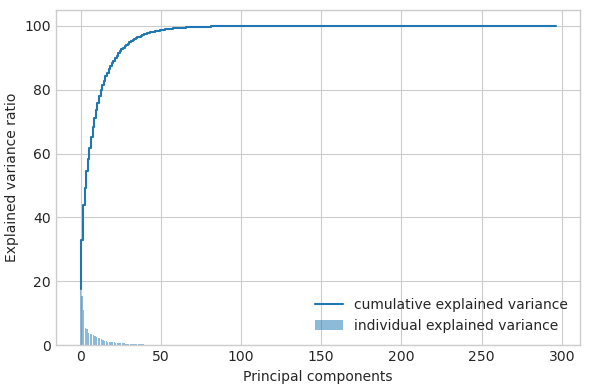

In [7]:
# for PCA analysis visualization. This shows the Eigenvalues.
# the ei
# after feature 101, Eigenvalues are less than 0.01
# after feature 134, Eigenvalues are less than 0.001
# the top 24 features contain 90% of the explanatory variables, (33 features for 95%)

mean_vec = np.mean(X_std, axis=0)
cov_mat = np.cov(X_std.T)

eig_vals, eig_vecs = np.linalg.eig(cov_mat)

# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
counter = 1
for i in eig_pairs:
    print(f'{counter}:\t {i[0]}')
    counter += 1
    
tot = sum(eig_vals)

var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]

cum_var_exp= np.cumsum(var_exp)

print(cum_var_exp)

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))

    plt.bar(range(297), var_exp, alpha=0.5, align='center',
            label='individual explained variance')
    plt.step(range(297), cum_var_exp, where='mid',
             label='cumulative explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

In [8]:
# used 33 components due to 95% of the variance can be explained by these features. see box above for calculation
n_comp = 33

sklearn_pca = sklearnPCA(n_components=n_comp)
X_pca = sklearn_pca.fit_transform(X_std)

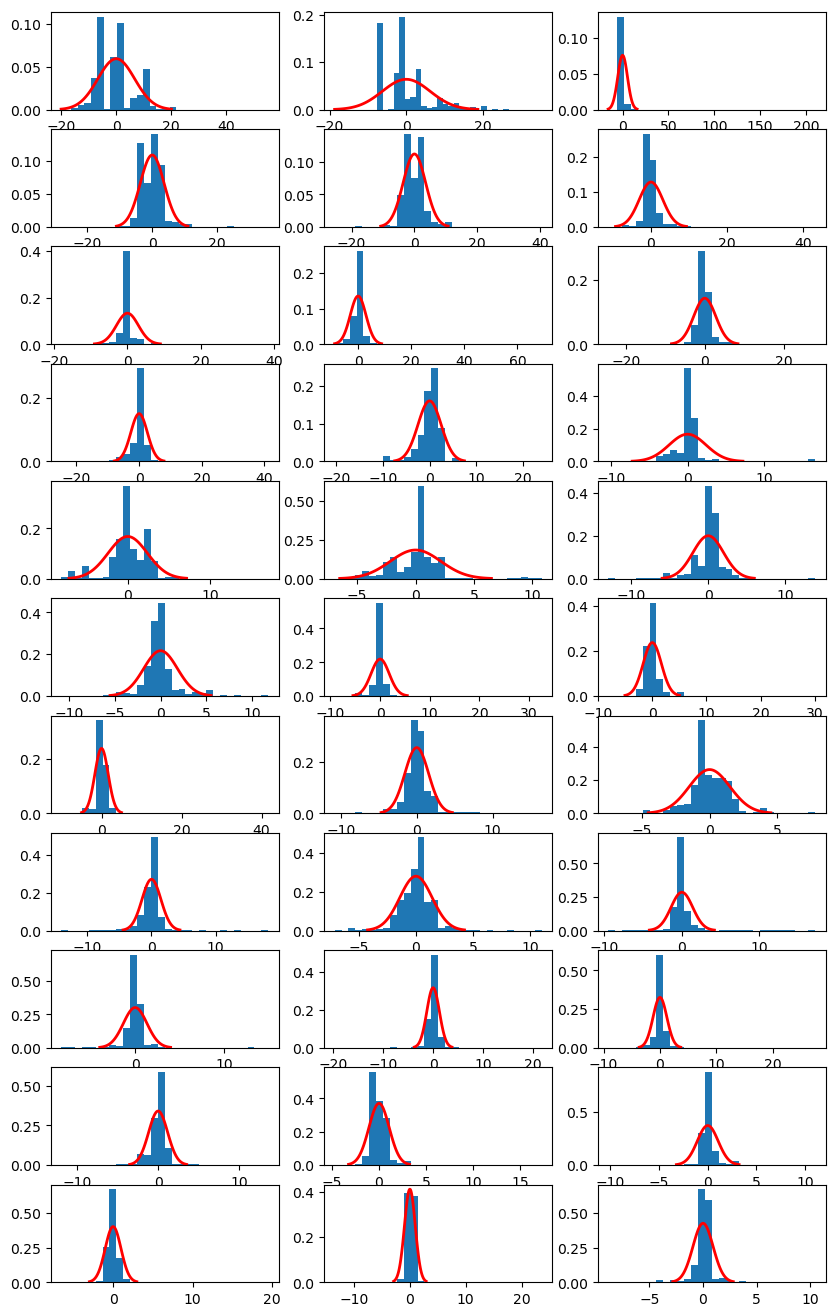

In [9]:
# plt.show()
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

plt.figure(figsize=(10, 50))
for i in range(1, n_comp + 1):
    plt.subplot(n_comp, 3, i)
    data = X_pca[:, i - 1]
    plt.hist(data, bins=30, density=True)  # Setting density=True for normalized histograms
    
    # Overlaying normal distribution curve
    mu, std = np.mean(data), np.std(data)
    x = np.linspace(mu - 3 * std, mu + 3 * std, 100)
    y = norm.pdf(x, mu, std)
    plt.plot(x, y, 'r-', linewidth=2)
    
plt.show()

# Models

### K-means

In [10]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

n_clus = 9

kmeans_model = KMeans(n_clusters = n_clus, random_state=0)
clusters = kmeans_model.fit(X_pca)

c:\Users\marce\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


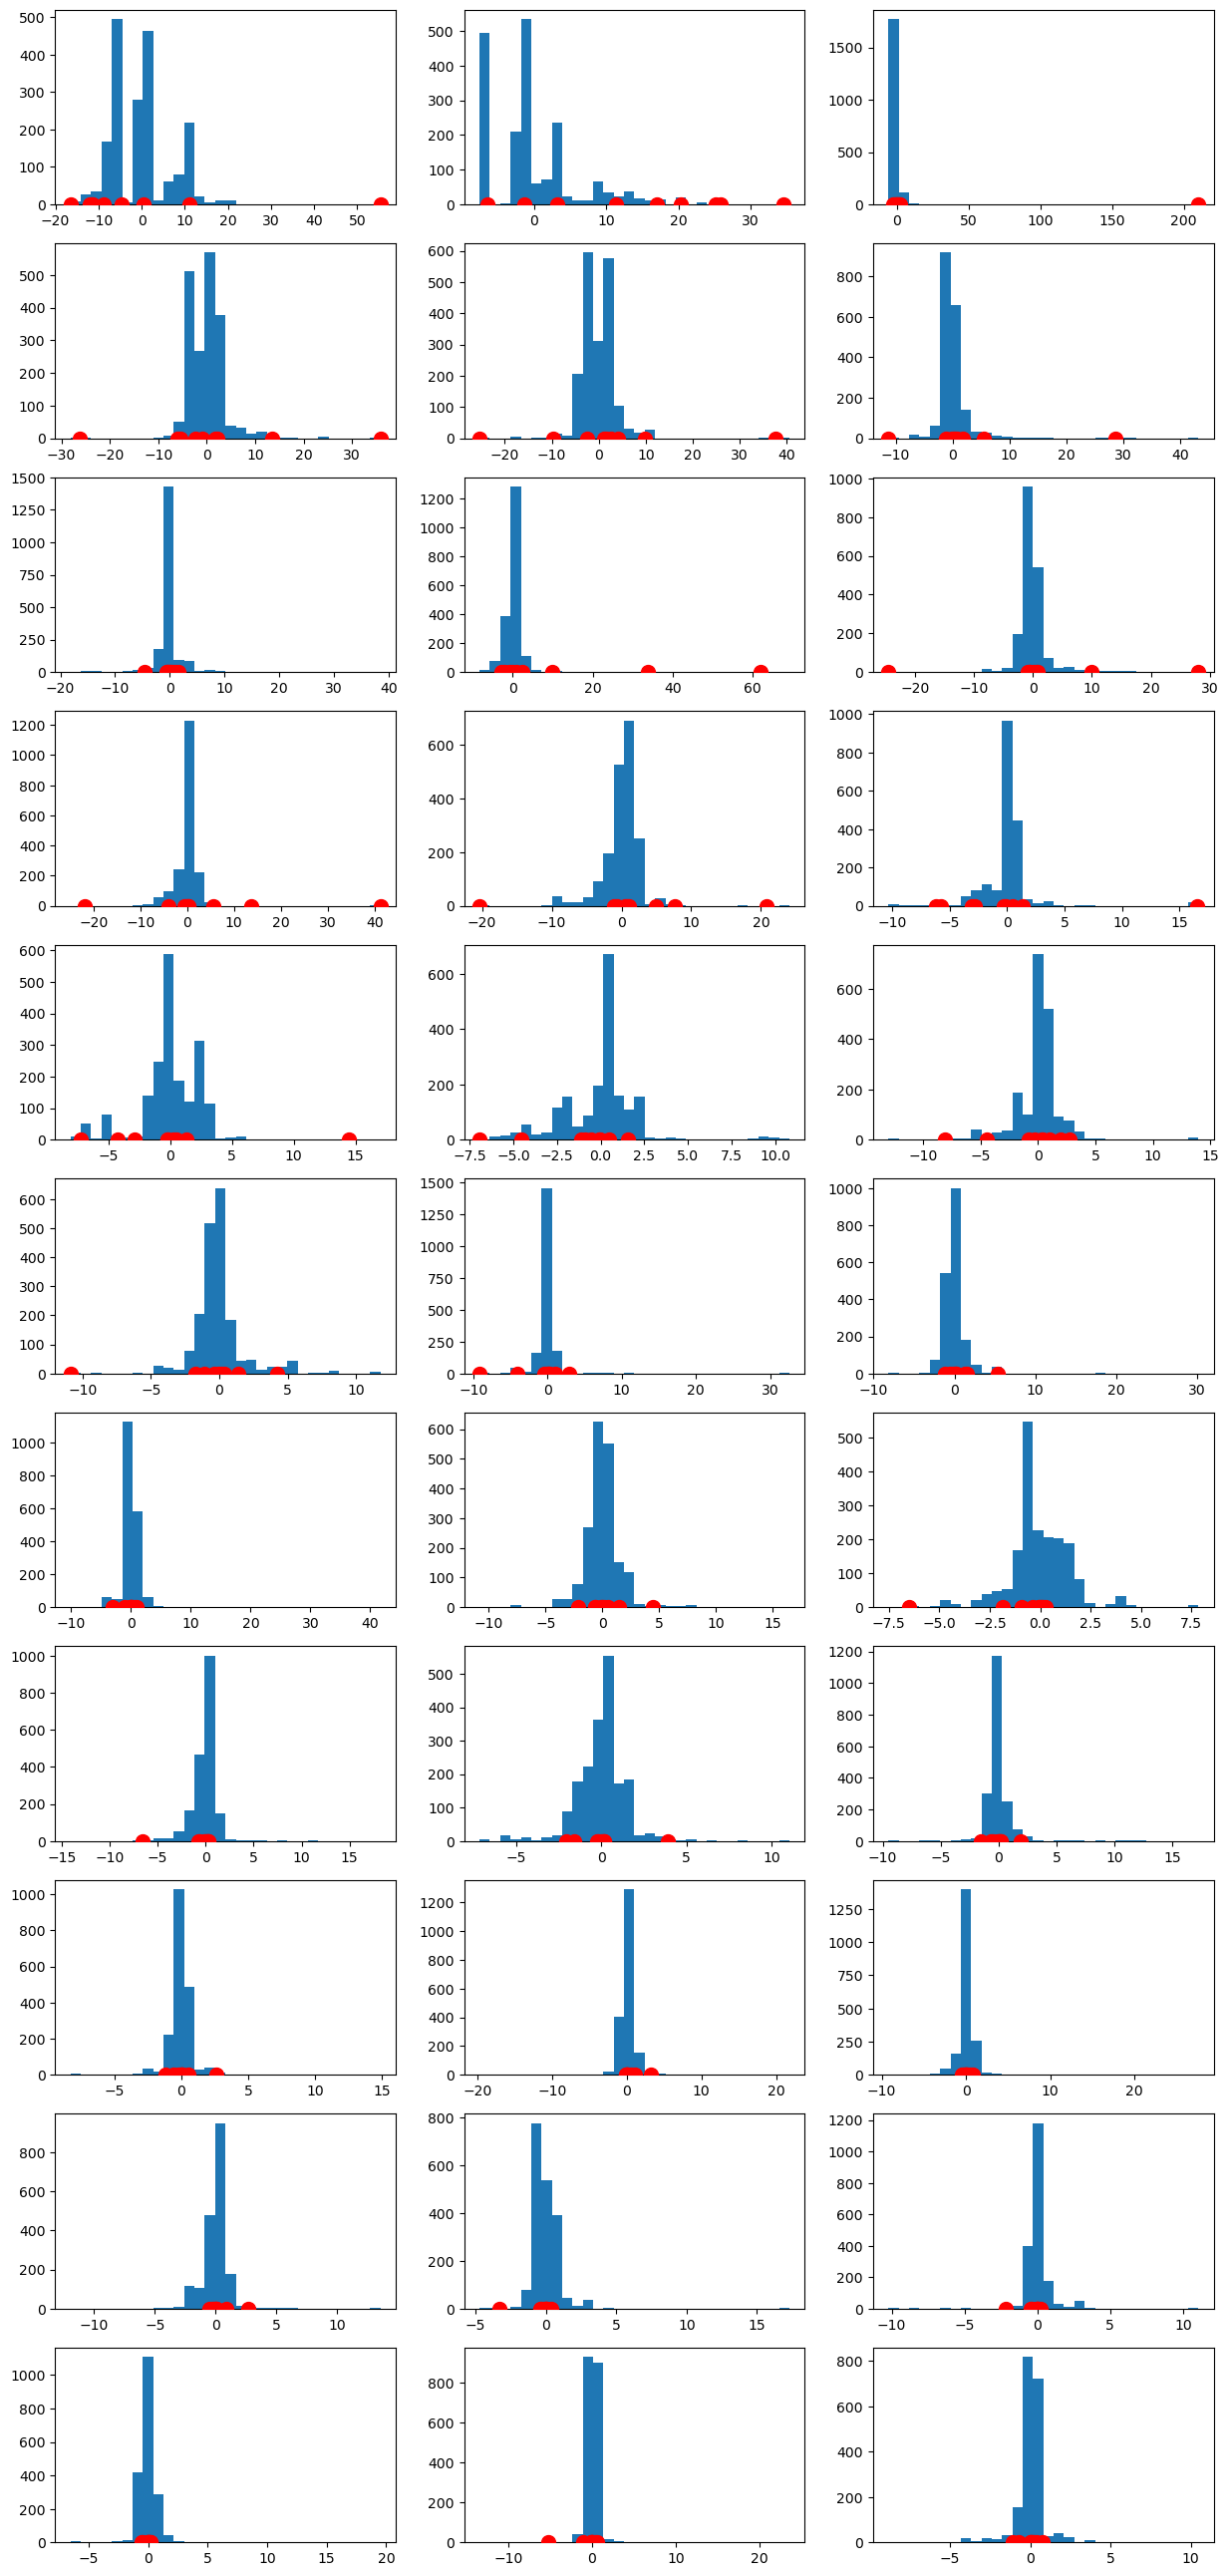

In [11]:
plt.figure(figsize=(15,100))
for i in range(1,n_comp + 1):
    plt.subplot(n_comp,3,i)
    plt.scatter(x = clusters.cluster_centers_[:,i-1], y=np.zeros(n_clus), c='red', s=100, zorder=10)
    plt.hist(X_pca[:,i-1], bins=30, zorder=0)
    
plt.show()

In [12]:
# Function to plot k-means clustering
def plot_kmeans(kmeans, X, n_clusters=4, rseed=0, ax=None):
    labels = kmeans.fit_predict(X)

    # Plot the input data
    ax = ax or plt.gca()
    ax.axis('equal')
    ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)
    ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
               marker='o', s=10, linewidths=2, color='red', zorder=3)
    ax.set_title(f'K-means Clustering (Clusters: {n_clusters}, Silhouette Score: {silhouette_score(X, labels):.3f})')


# Plot k-means noncircular clustering
def plot_kmeans_noncircular(kmeans, X, n_clusters=4, rseed=0, ax=None):
    labels = kmeans.fit_predict(X)

    # Plot the input data
    ax = ax or plt.gca()
    ax.axis('equal')
    ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)
    ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
               marker='o', s=100, linewidths=2, color='red', zorder=3)
    ax.set_title('K-means Noncircular Clustering')

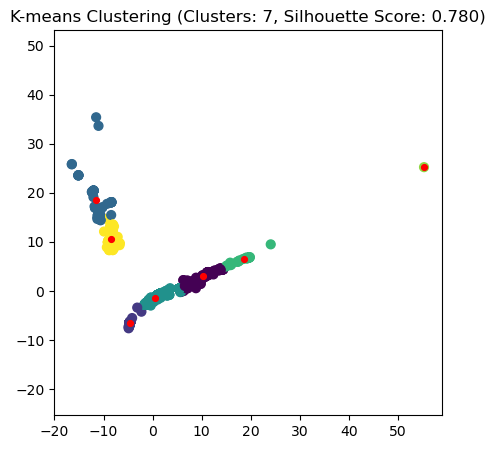

In [13]:
# Plot k-means circular clustering
n_clusters = 7

kmeans = KMeans(n_clusters=n_clusters, random_state=0, n_init="auto")
plt.figure(figsize=(5, 5))
plot_kmeans(kmeans, X_pca[:, :2], n_clusters)
plt.show()

In [14]:
# Generate noncircular data
rng = np.random.RandomState(13)
X_stretched = np.dot(X_pca, rng.randn(n_comp, n_comp))

In [15]:
# Perform k-means clustering on noncircular data
n_clusters = 9
kmeans_noncircular = KMeans(n_clusters=n_clusters, random_state=0)
kmeans_noncircular.fit(X_stretched)

c:\Users\marce\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=9, random_state=0)

c:\Users\marce\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


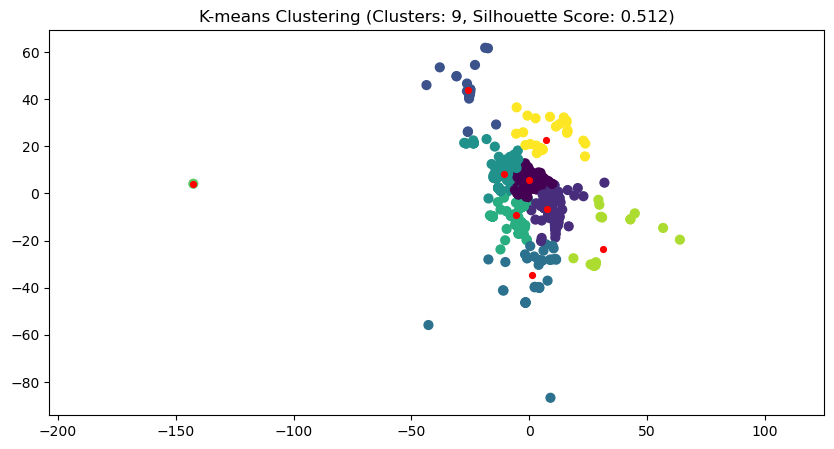

In [16]:
# Plot k-means noncircular clustering
plt.figure(figsize=(10, 5))
plot_kmeans(kmeans_noncircular, X_stretched[:, :2], n_clusters)
plt.show()

In [17]:
# BIC, AIC, and SSD calculations

from scipy.spatial import distance

from statistics import mean
import warnings
warnings.filterwarnings('ignore')

def computeMeasures (clstrs, X):
    n = X.shape[1]
    m = X.shape[0]
    k = len(clstrs.cluster_centers_)
    Dw = np.power(clstrs.inertia_, 2)
    Db = 0
    for cc0 in range(k):
        for cc1 in range(k):
            if not cc0 == cc1:
                Db = Db + distance.euclidean (clstrs.cluster_centers_[cc0], clstrs.cluster_centers_[cc1])
    ##print "Dw = %.3f; Db = %.3f" %(Dw,Db)
    D = np.sqrt (Dw + np.power(Db, 2))
    BIC = D + np.log(n)*m*k
    AIC = D + 2*m*k    
    return BIC, AIC


BIC_min = [float('inf')] * n_comp
BIC_clus = [0] * n_comp
AIC_min = [float('inf')] * n_comp
AIC_clus = [0] * n_comp
 
num_k = 15 # number of k values used for AI model
    
avg_SSD = [None] * num_k
for ff in np.arange (X_pca.shape[1]):

    myX = X_pca[:,ff].reshape (len (X_pca[:,ff]), 1)
#     print (f"Feature {ff}")
    # print myX.shape
    
    # number of clusters to test
    SSD = []
    for nn in range (1,num_k+1):
        km = KMeans (n_clusters=nn, init='k-means++', random_state=0)
        clstrs = km.fit (myX)
        SSD.append(km.inertia_)
        bic, aic = computeMeasures(clstrs, myX)
        if bic < BIC_min[ff]:
            BIC_min[ff] = bic
            BIC_clus[ff] = nn
        if aic < AIC_min[ff]:
            AIC_min[ff] = aic
            AIC_clus[ff] = nn
#         print ("Number of clusters = %d.  BIC = %.3f. AIC = %.3f" % (nn, bic, aic))
#     print(f'BIC min: {BIC_min[ff]}. {BIC_clus[ff]} clusters\nAIC min: {AIC_min[ff]}. {AIC_clus[ff]} clusters')
    for i in range(0,num_k-1):
        if avg_SSD[i] == None:
            avg_SSD[i] = SSD[i]
        else:
            avg_SSD[i] = mean((avg_SSD[i], SSD[i]))


# for i in range(len(BIC_min)):
#     print(f'Feature {i}\nBIC min: {BIC_min[i]}. {BIC_clus[i]} clusters\nAIC min: {AIC_min[i]}. {AIC_clus[i]} clusters\n')
print(f'\naverage mean clusters BIC: {mean(BIC_clus)}')
print(f'average mean clusters AIC: {mean(AIC_clus)}')


average mean clusters BIC: 6.848484848484849
average mean clusters AIC: 1.5757575757575757


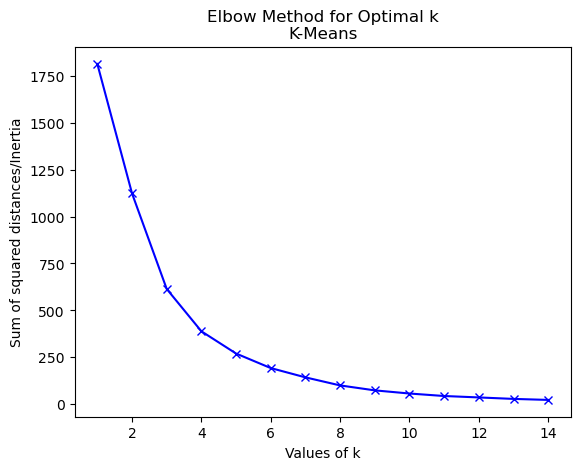

In [18]:
# Elbow Curve
plt.plot(range(1,16),avg_SSD, 'bx-')
plt.xlabel('Values of k')
plt.ylabel('Sum of squared distances/Inertia')
plt.title('Elbow Method for Optimal k\nK-Means')
plt.show()

For n_clusters = 2. The average silhouette_score is : 0.5457439768071635
For n_clusters = 3. The average silhouette_score is : 0.520666908057757
For n_clusters = 4. The average silhouette_score is : 0.5219585324628953
For n_clusters = 5. The average silhouette_score is : 0.5020722901205663
For n_clusters = 6. The average silhouette_score is : 0.7689767267044982
For n_clusters = 7. The average silhouette_score is : 0.6365350377795221
For n_clusters = 8. The average silhouette_score is : 0.7076944888910578
For n_clusters = 9. The average silhouette_score is : 0.6977291738330337
For n_clusters = 10. The average silhouette_score is : 0.7244438518523659
For n_clusters = 11. The average silhouette_score is : 0.6076651872688734
For n_clusters = 12. The average silhouette_score is : 0.44198097428785416
For n_clusters = 13. The average silhouette_score is : 0.4654245790464412
For n_clusters = 14. The average silhouette_score is : 0.49358633708522254
For n_clusters = 15. The average silhouette_s

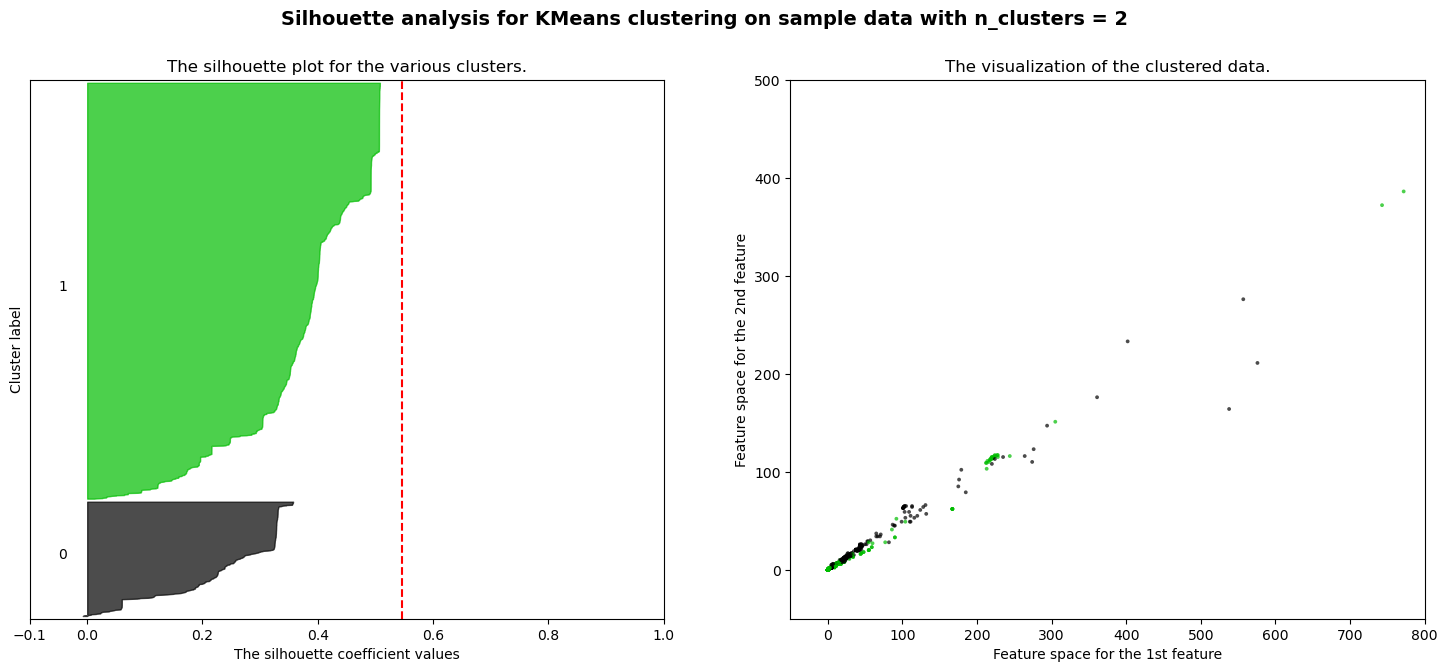

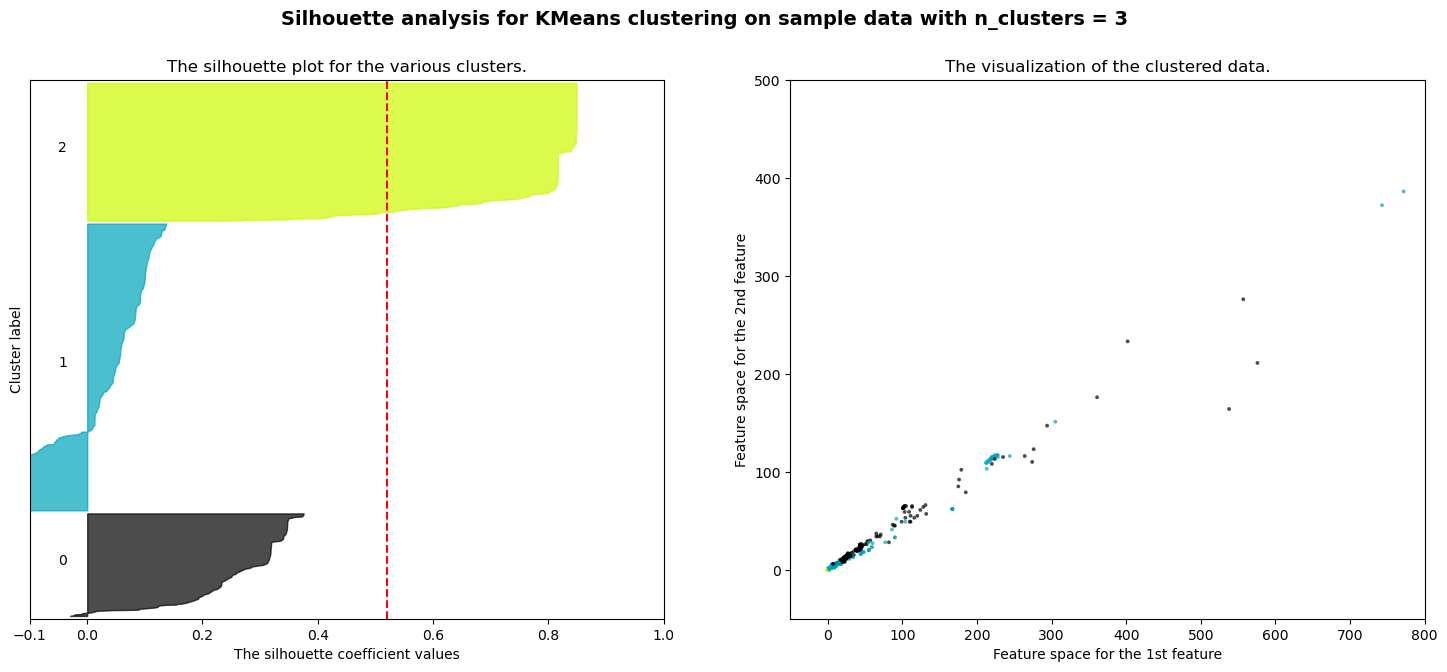

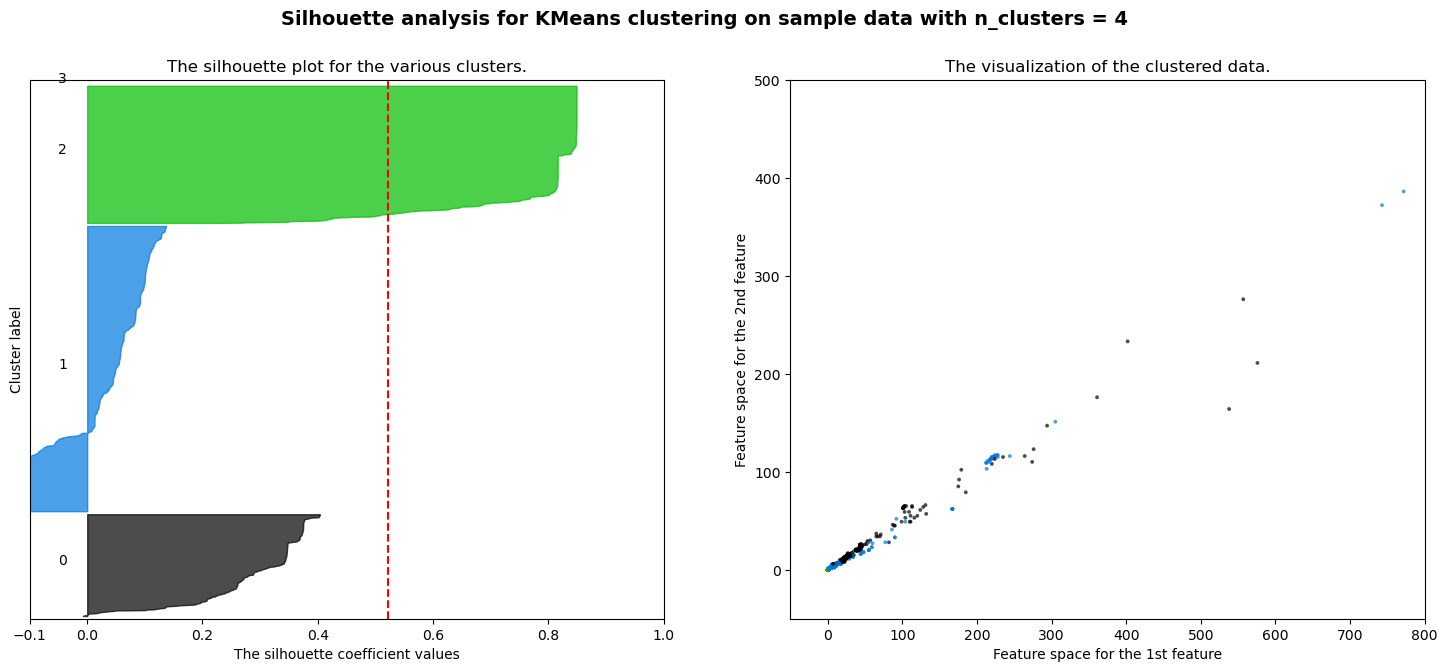

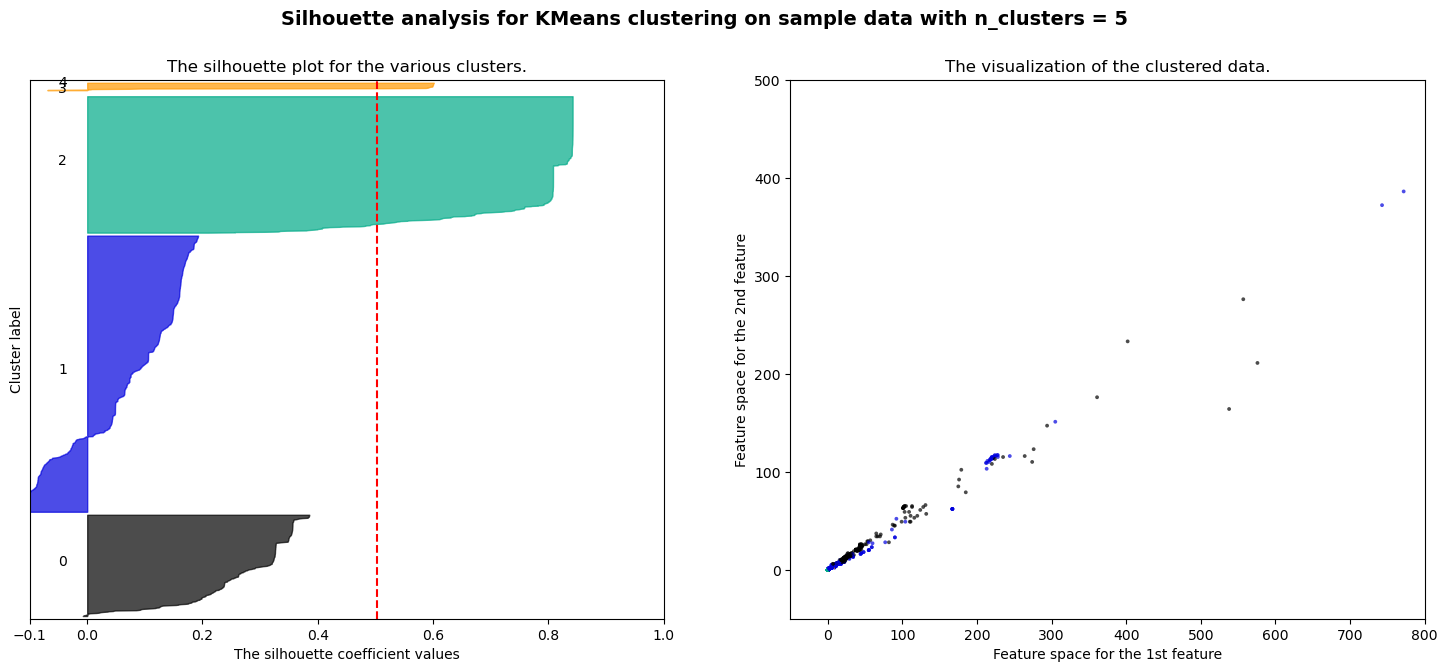

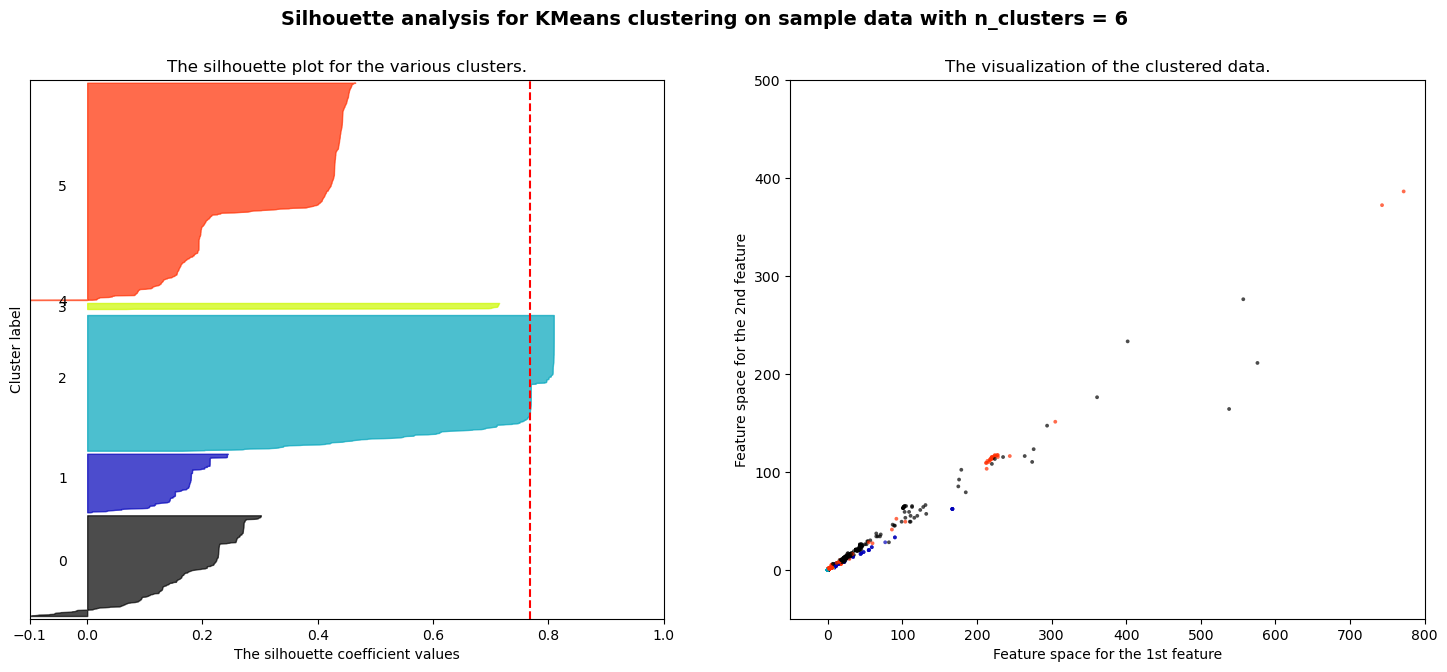

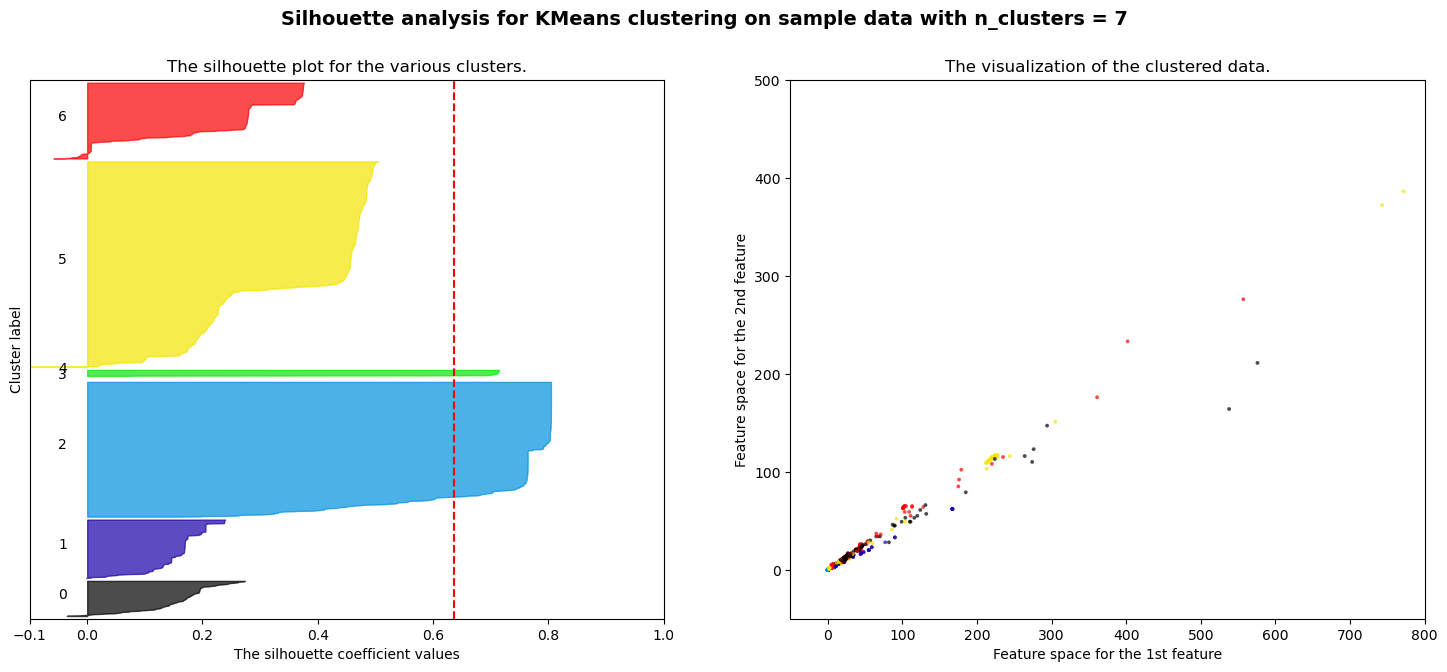

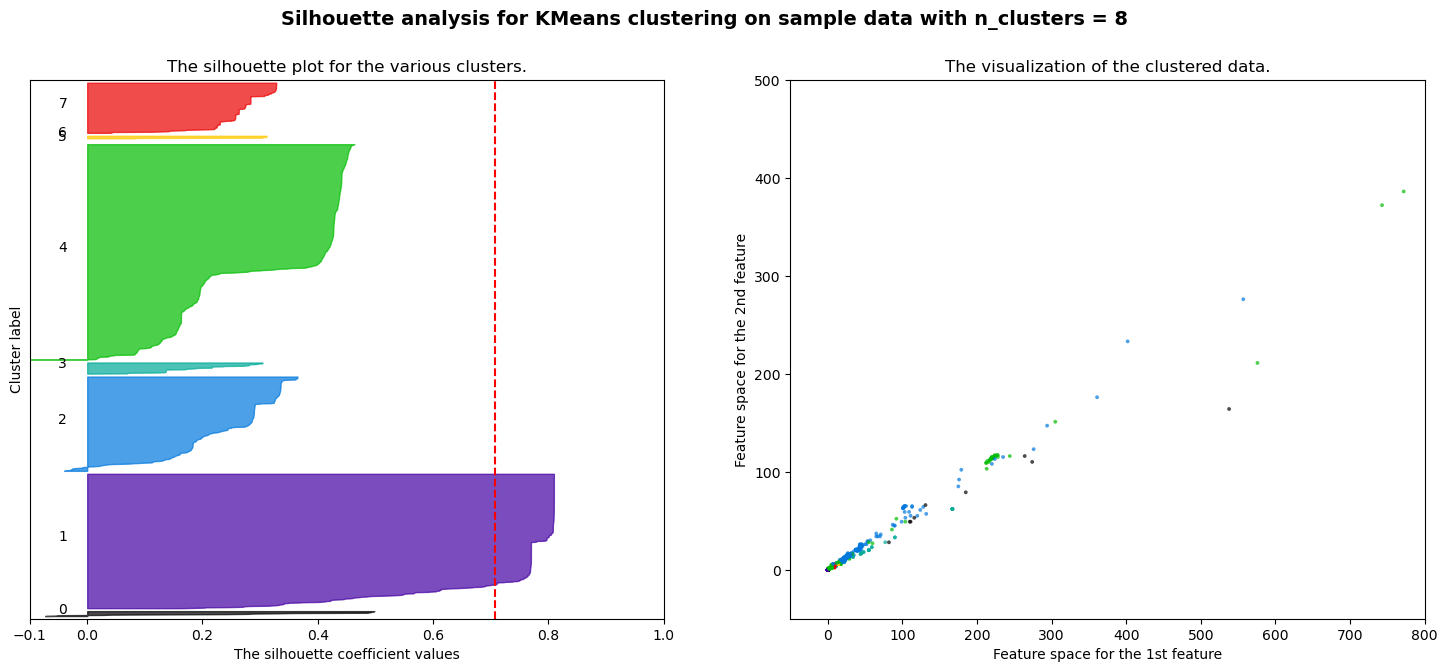

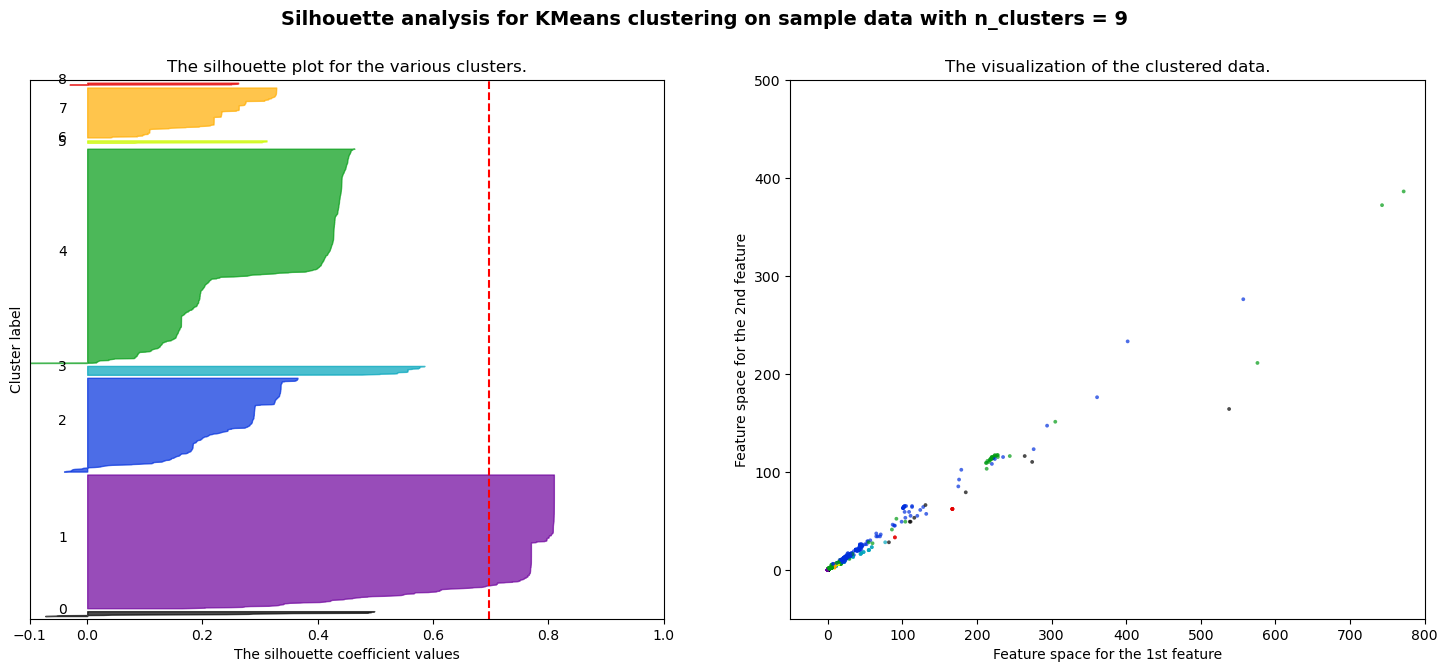

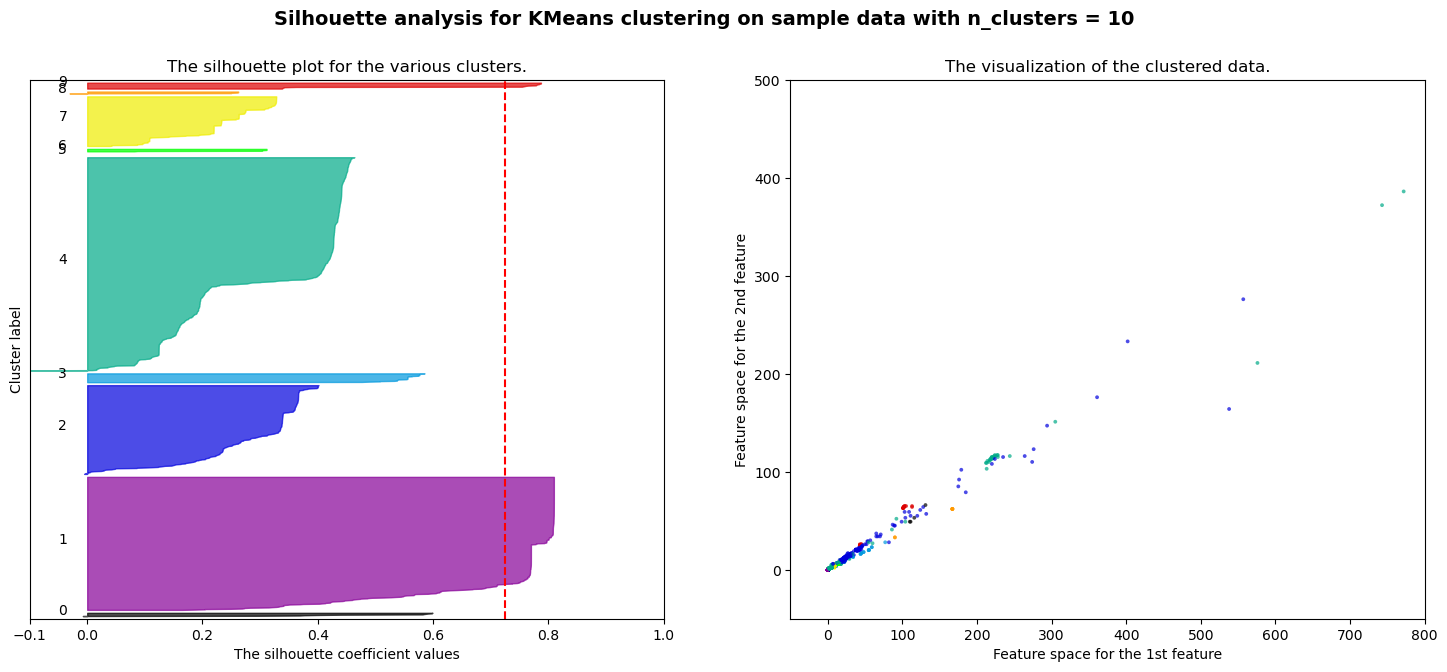

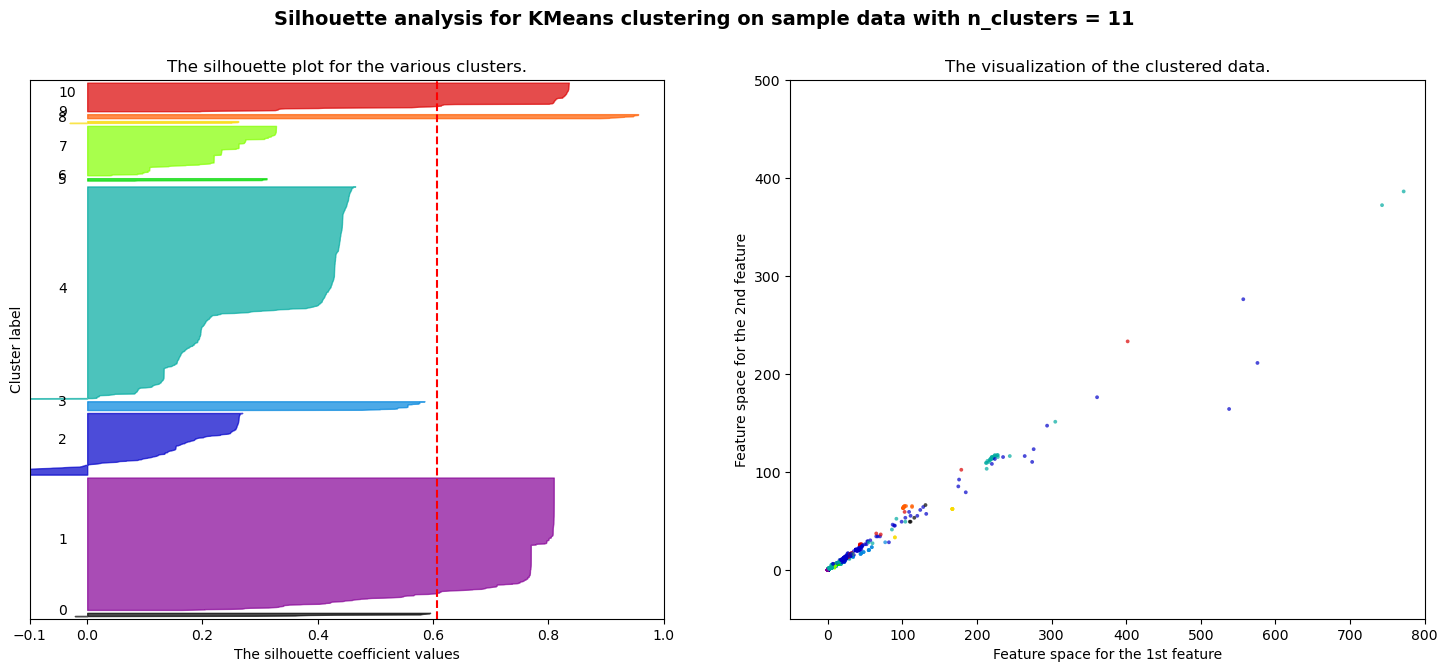

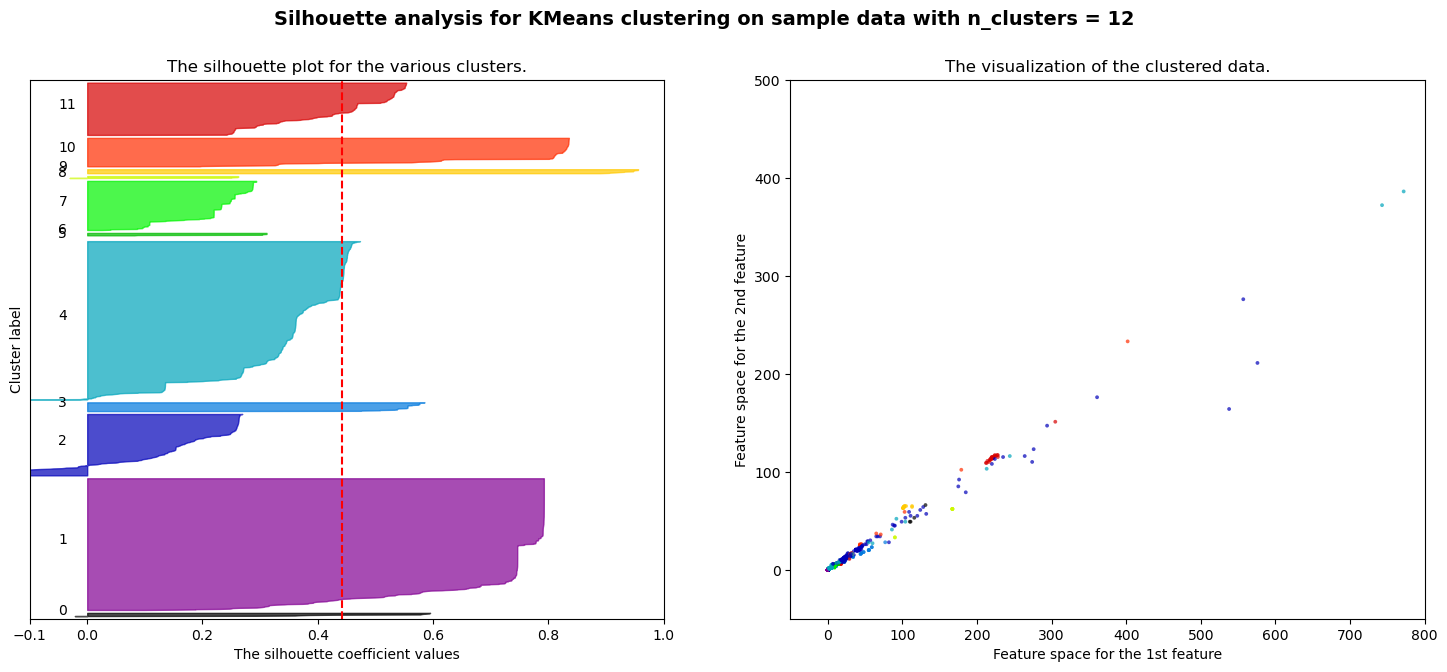

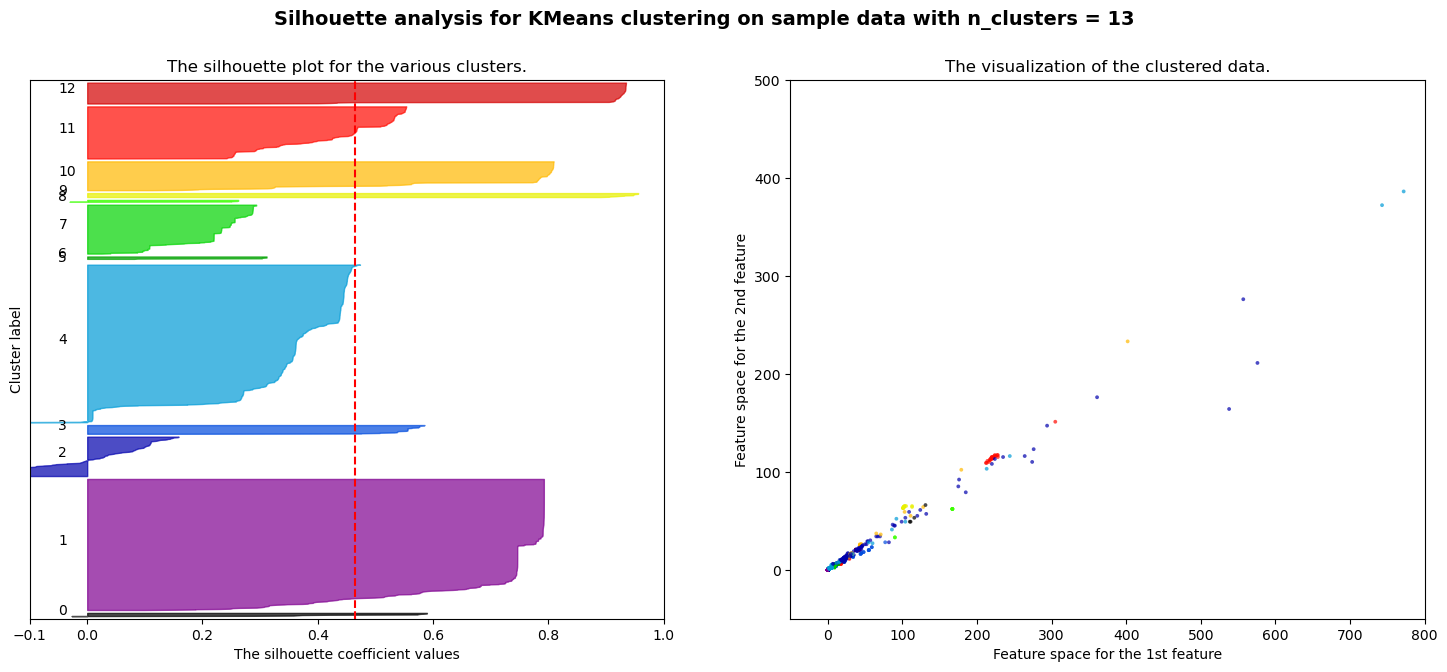

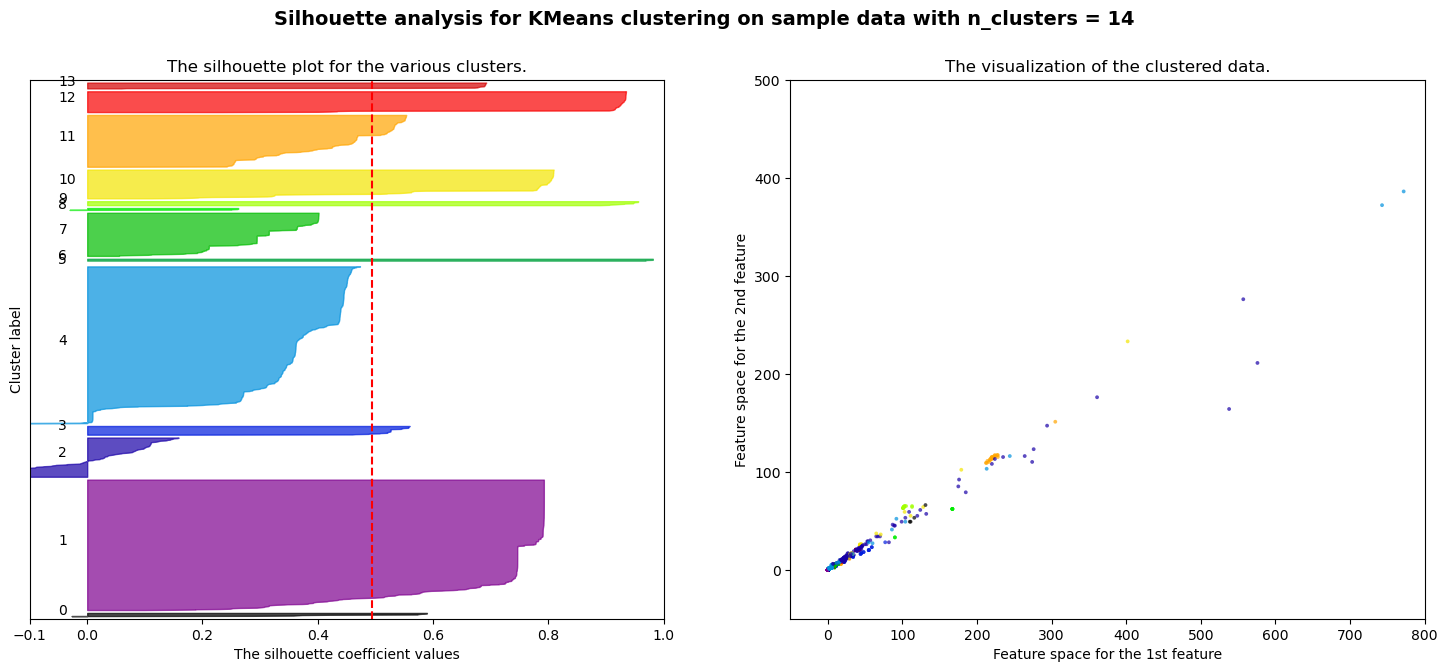

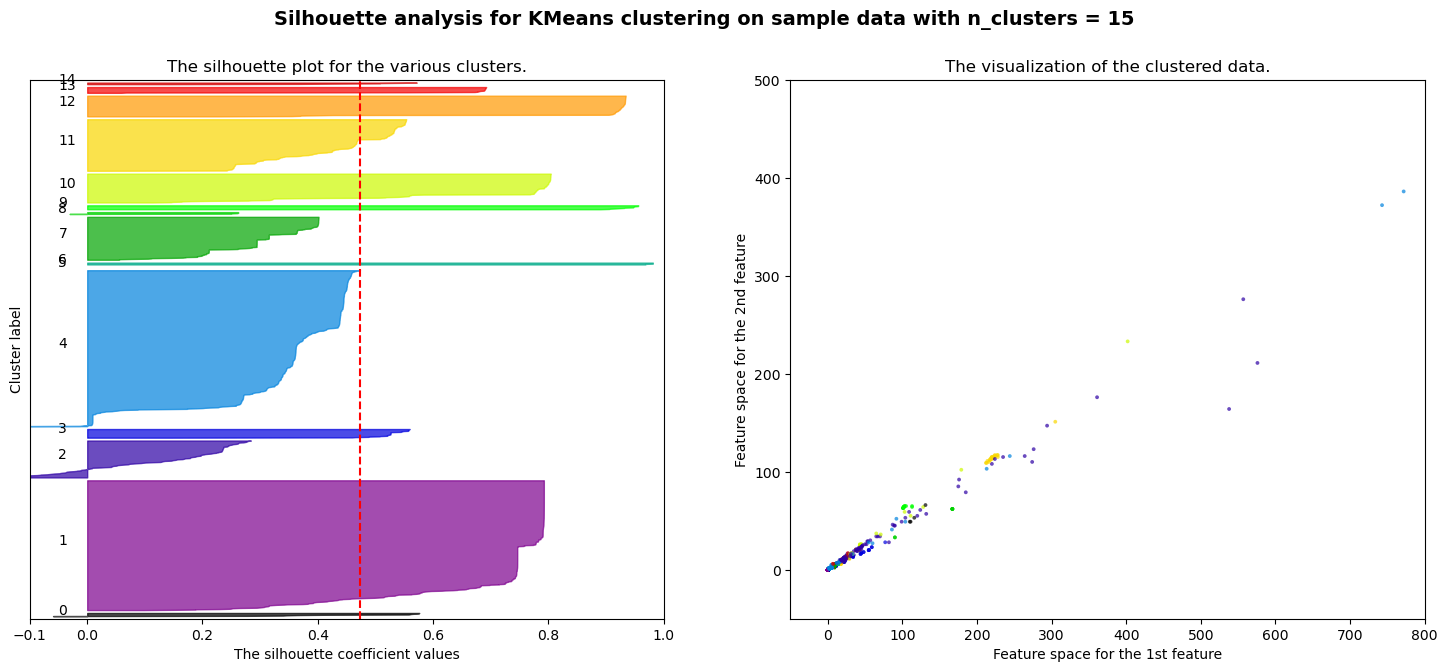

In [19]:
for n_clusters in range(2, num_k + 1):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    
    # Plot 1 for silhouette plot
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    model = KMeans(n_clusters=n_clusters, n_init="auto", random_state=0)
    cluster_labels = model.fit_predict(X_pca)

    silhouette_avg = silhouette_score(X_pca[:,:2], cluster_labels)
    print(f'For n_clusters = {n_clusters}. The average silhouette_score is : {silhouette_avg}')

    # Compute the silhouette scores
    sample_silhouette_values = silhouette_samples(X_pca, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores 
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = model.cluster_centers_

    for i, c in enumerate(centers):
        ax2.set_xlim([-50,800])
        ax2.set_ylim([-50,500])

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

### DBSCAN

In [20]:
from sklearn.cluster import DBSCAN  

db = DBSCAN(eps=9, min_samples=10).fit(X_pca) # EPS: max distance between two points to be considered neighbors, min_samples: number of samples needed to form a dense point (core)
labels = db.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 9
Estimated number of noise points: 89


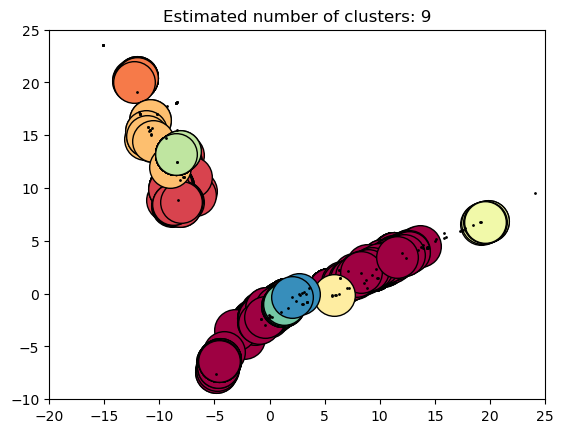

<Figure size 5000x5000 with 0 Axes>

In [21]:
unique_labels = set(labels)
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = X_pca[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=30
    )

    xy = X_pca[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=1,
    )

plt.title(f"Estimated number of clusters: {n_clusters_}")

plt.xlim(-20, 25)  # Adjust the minimum and maximum values of the x-axis
plt.ylim(-10, 25)  # Adjust the minimum and maximum values of the y-axis
plt.figure(figsize=(50,50)) 
# Display or save the plot

plt.show()

For epsilon = 2 Clusters = 25 The average silhouette_score is : 0.4313560497594125
For epsilon = 3 Clusters = 20 The average silhouette_score is : 0.49544893852524663
For epsilon = 4 Clusters = 18 The average silhouette_score is : 0.5252385999668908
For epsilon = 5 Clusters = 15 The average silhouette_score is : 0.47635715719474636
For epsilon = 6 Clusters = 13 The average silhouette_score is : 0.4555296824717632
For epsilon = 7 Clusters = 12 The average silhouette_score is : 0.4540759038107683
For epsilon = 8 Clusters = 8 The average silhouette_score is : 0.43847432400714376
For epsilon = 9 Clusters = 9 The average silhouette_score is : 0.2594247351983843
For epsilon = 10 Clusters = 8 The average silhouette_score is : 0.3884636426487787
For epsilon = 11 Clusters = 7 The average silhouette_score is : 0.3850406534706442
For epsilon = 12 Clusters = 7 The average silhouette_score is : 0.3847168547267463
For epsilon = 13 Clusters = 6 The average silhouette_score is : 0.37538191484986755
Fo

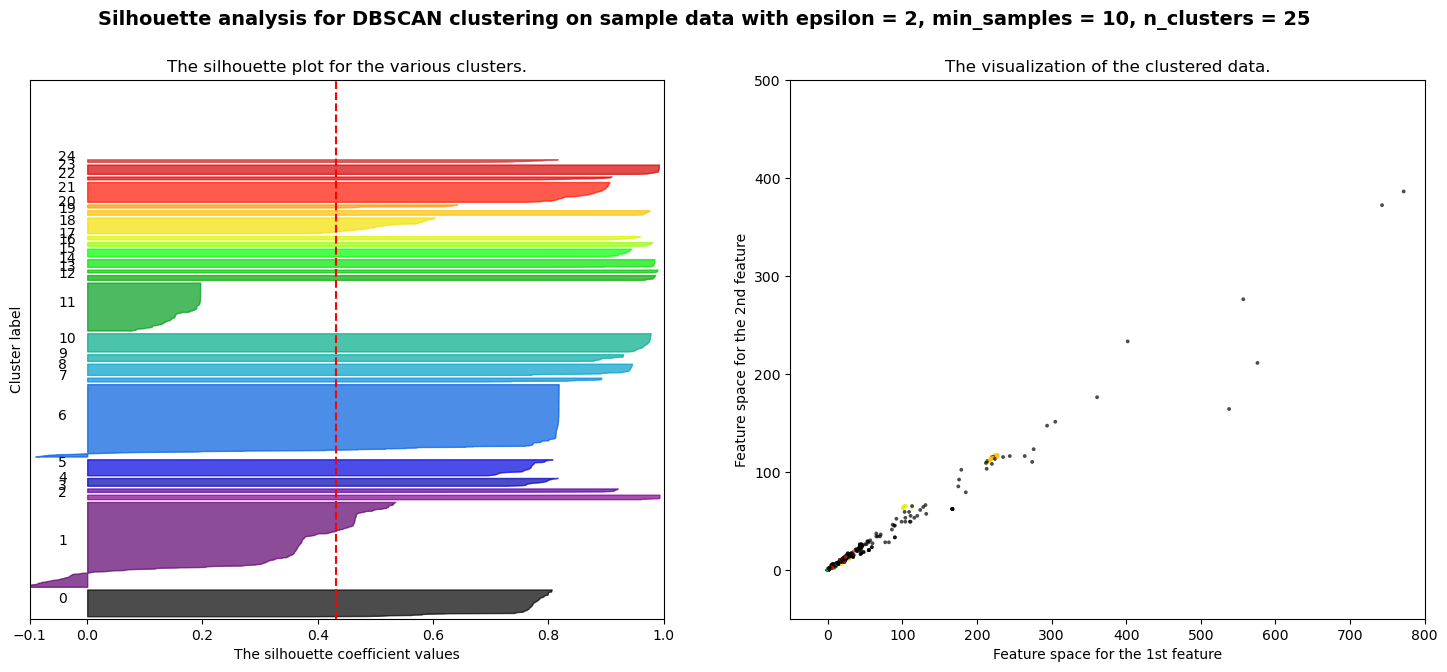

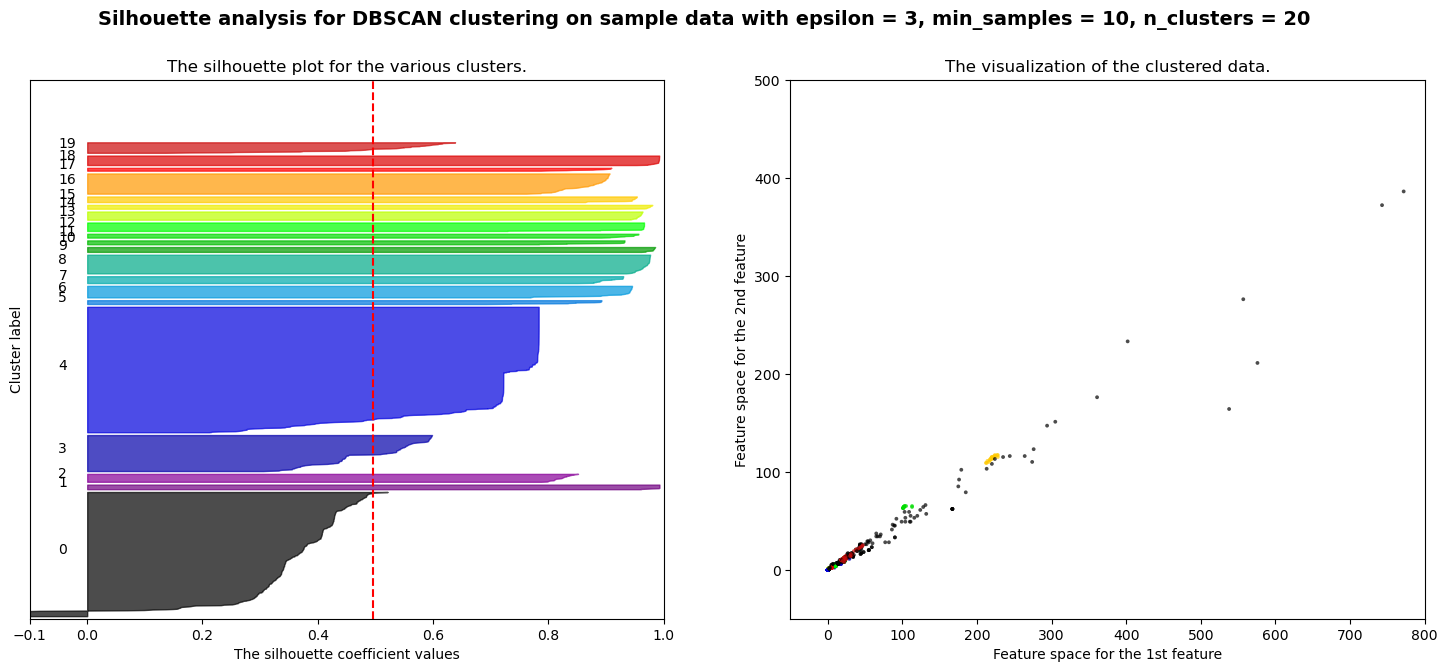

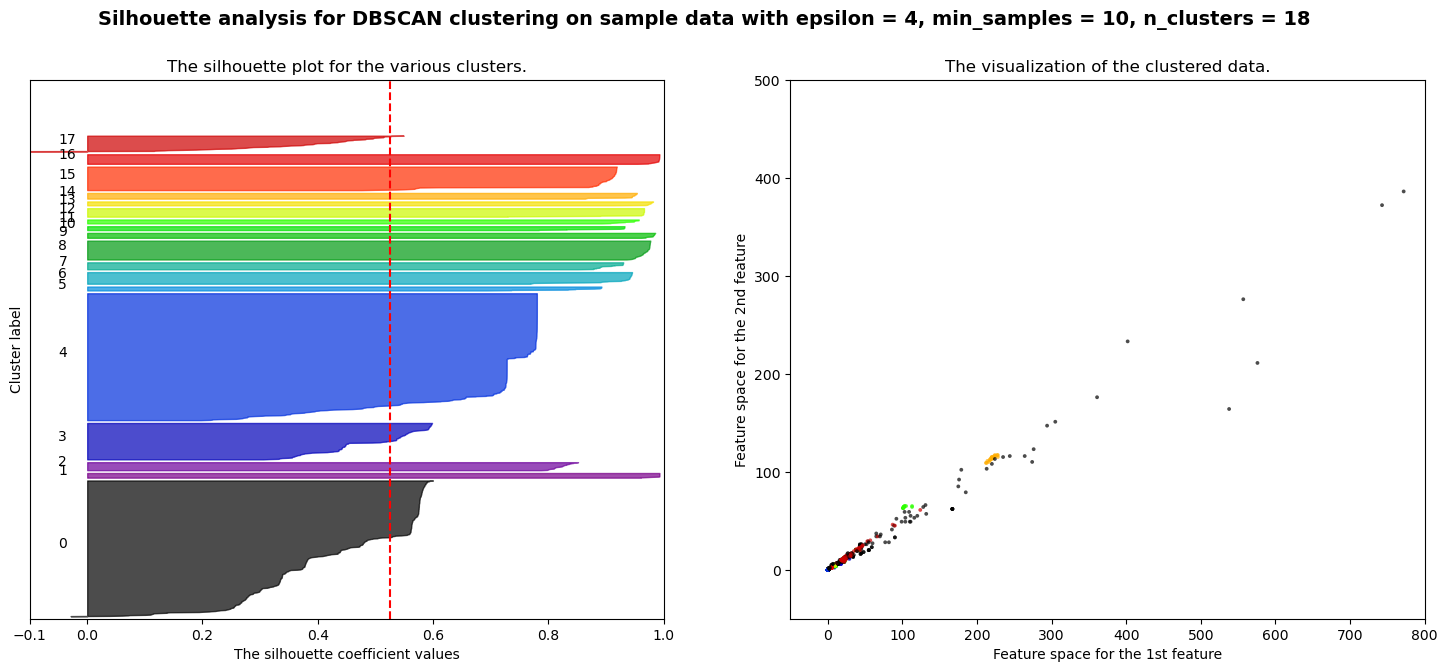

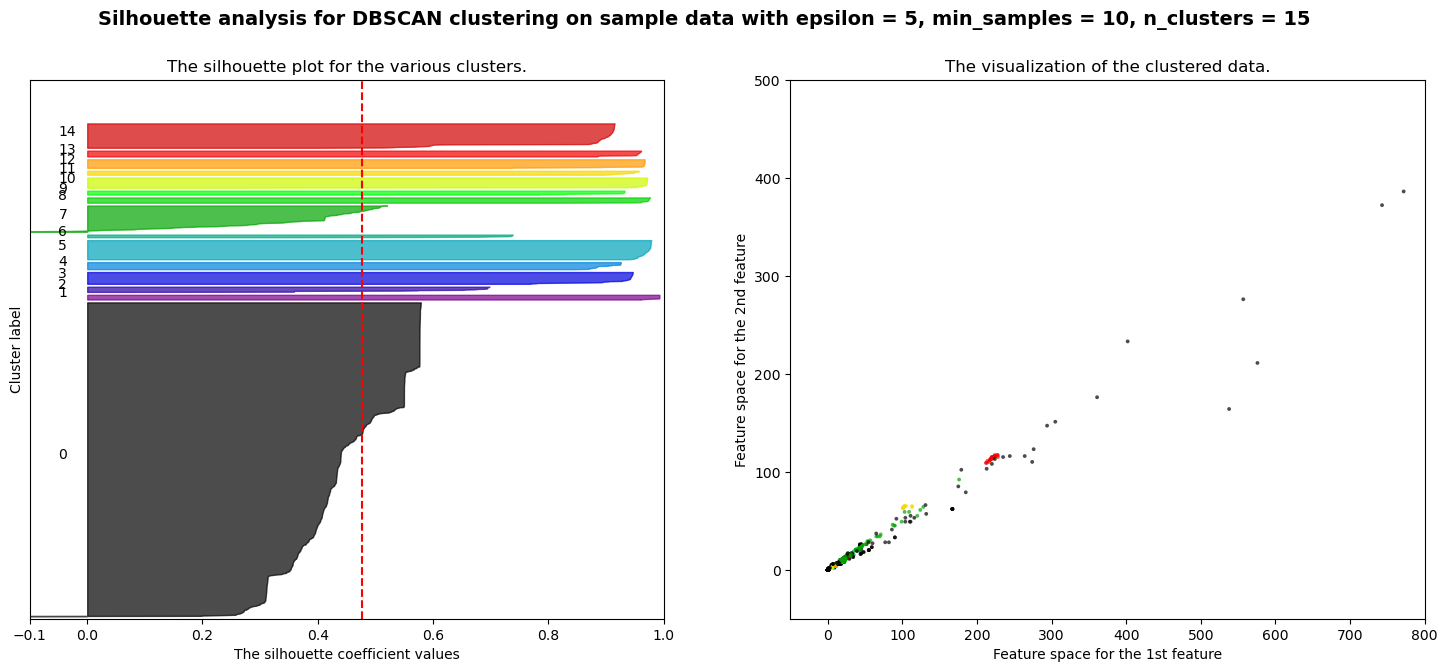

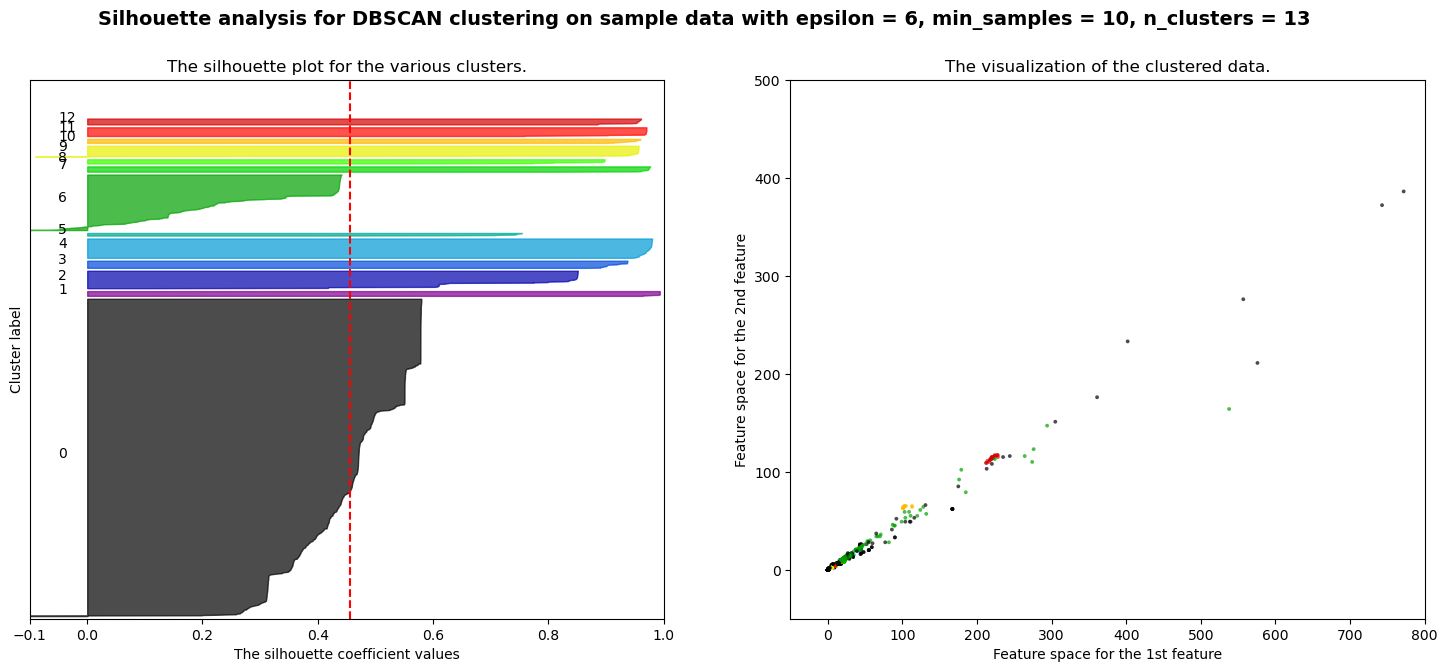

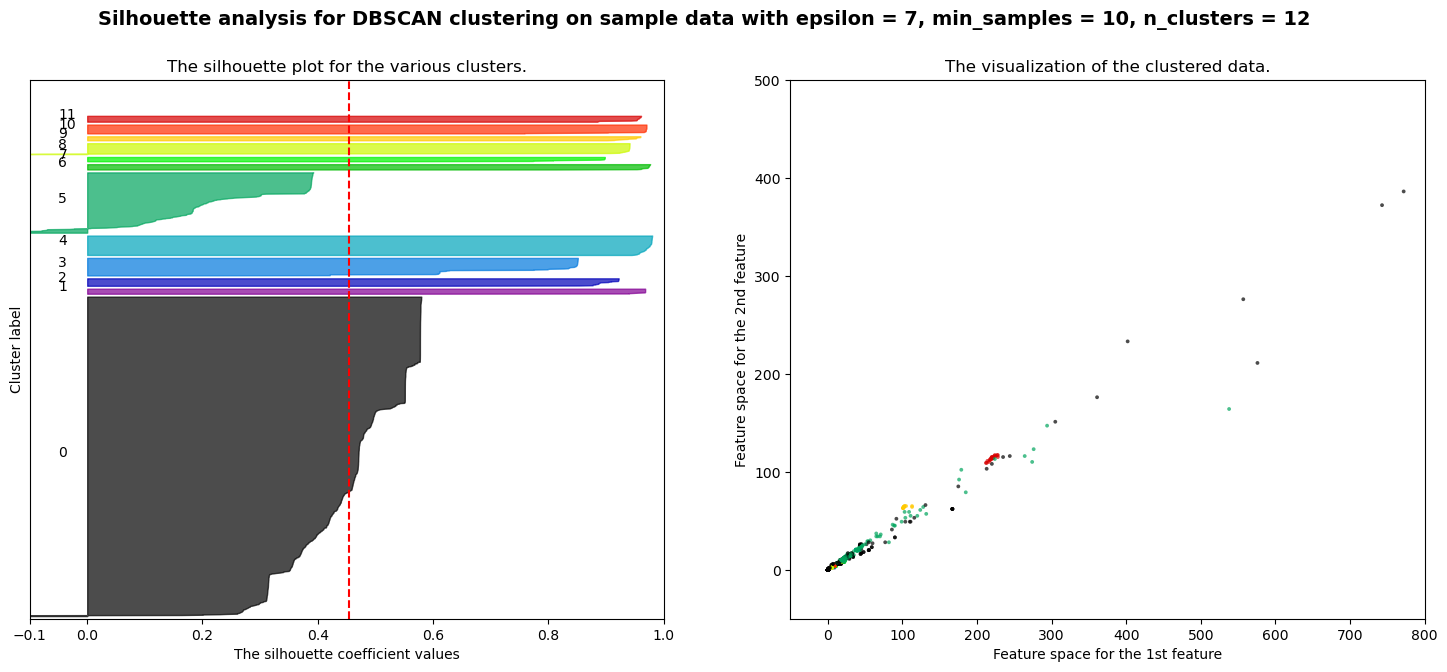

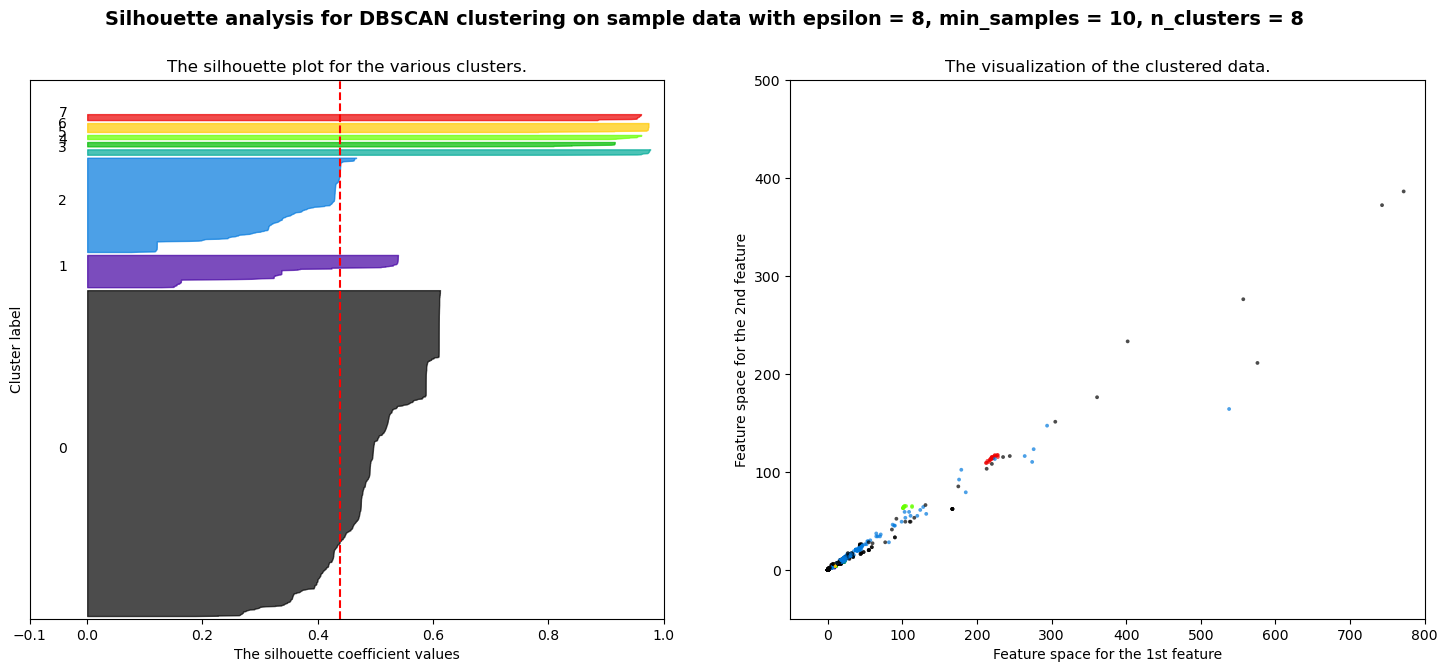

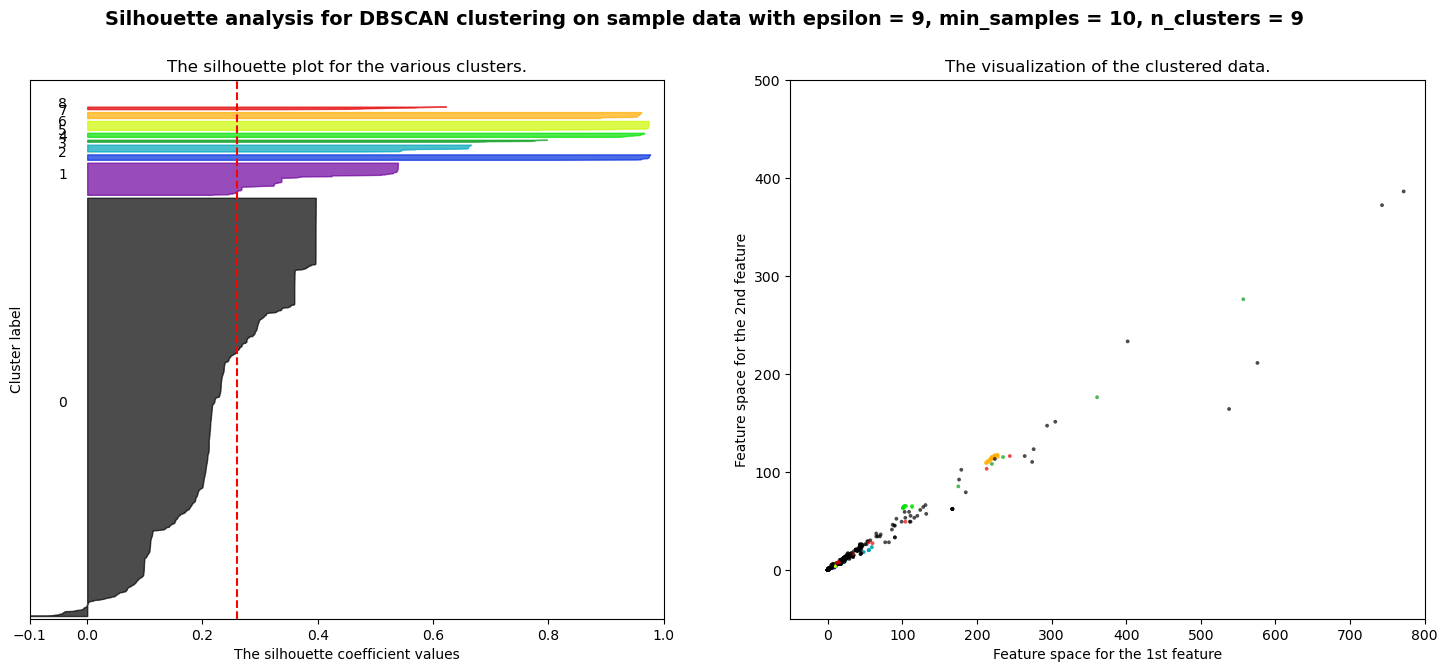

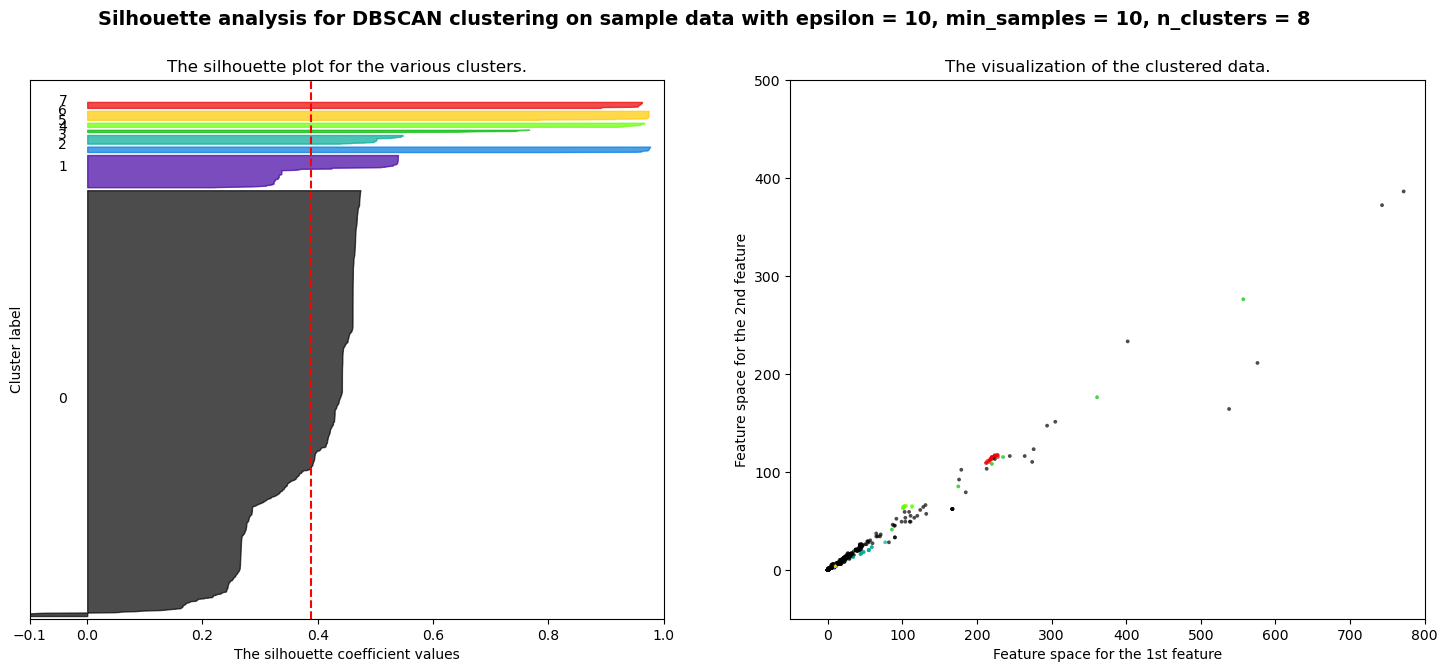

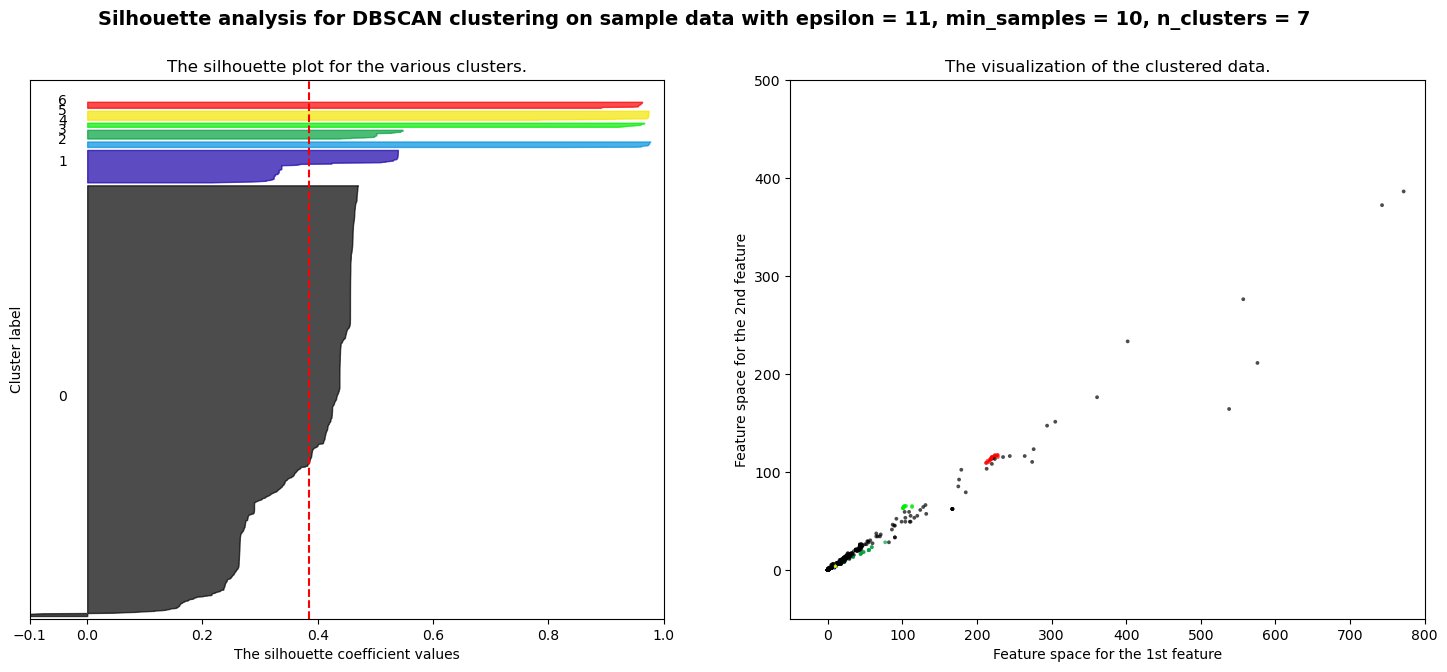

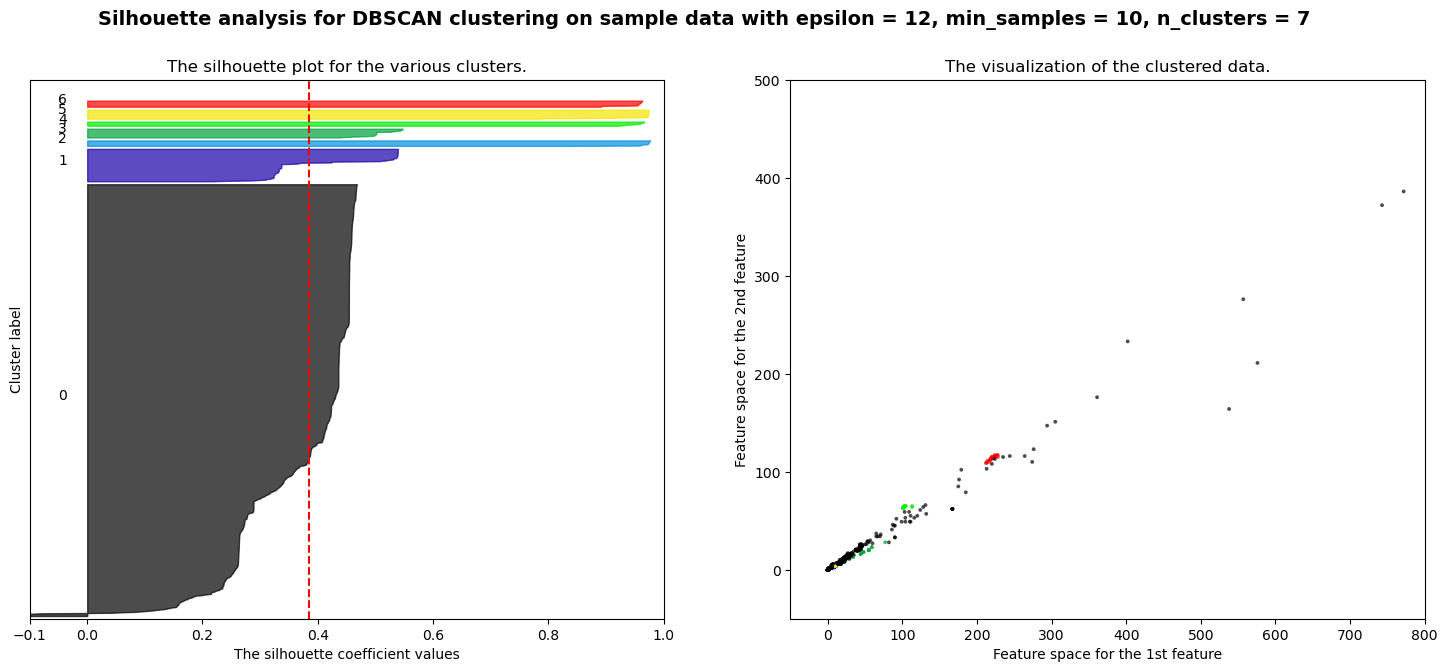

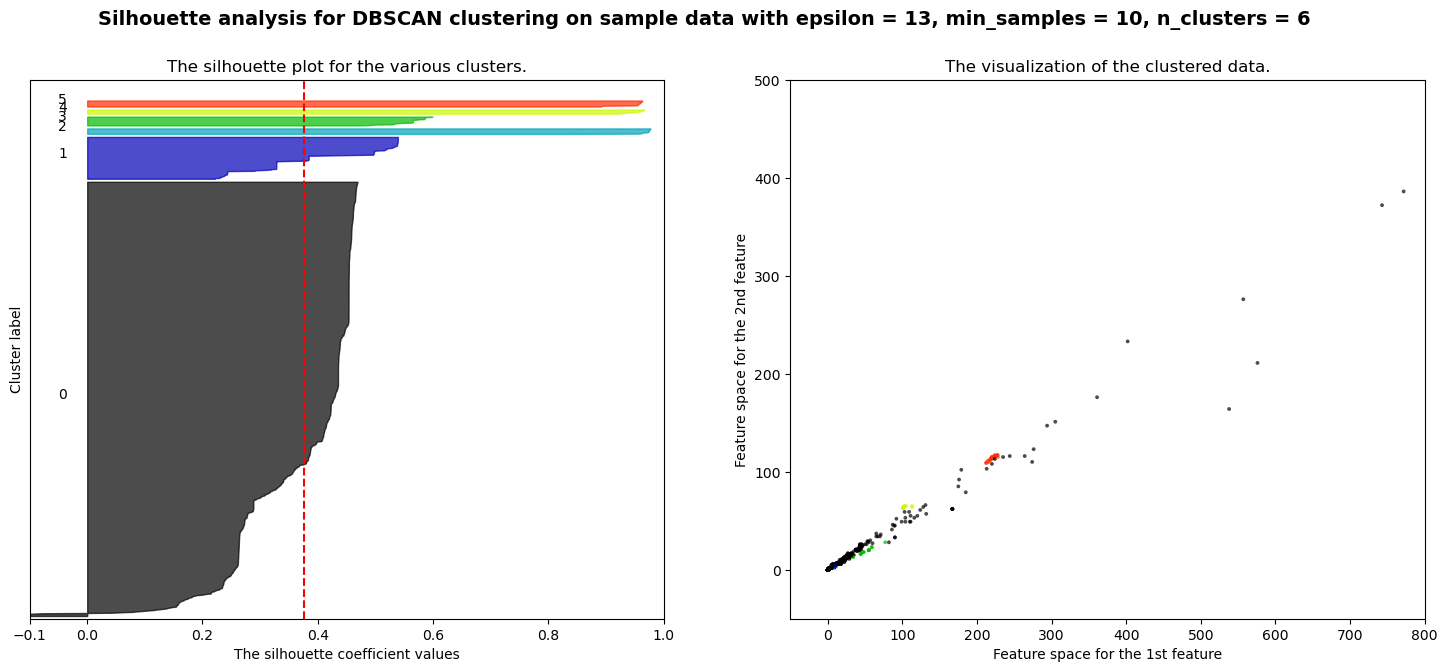

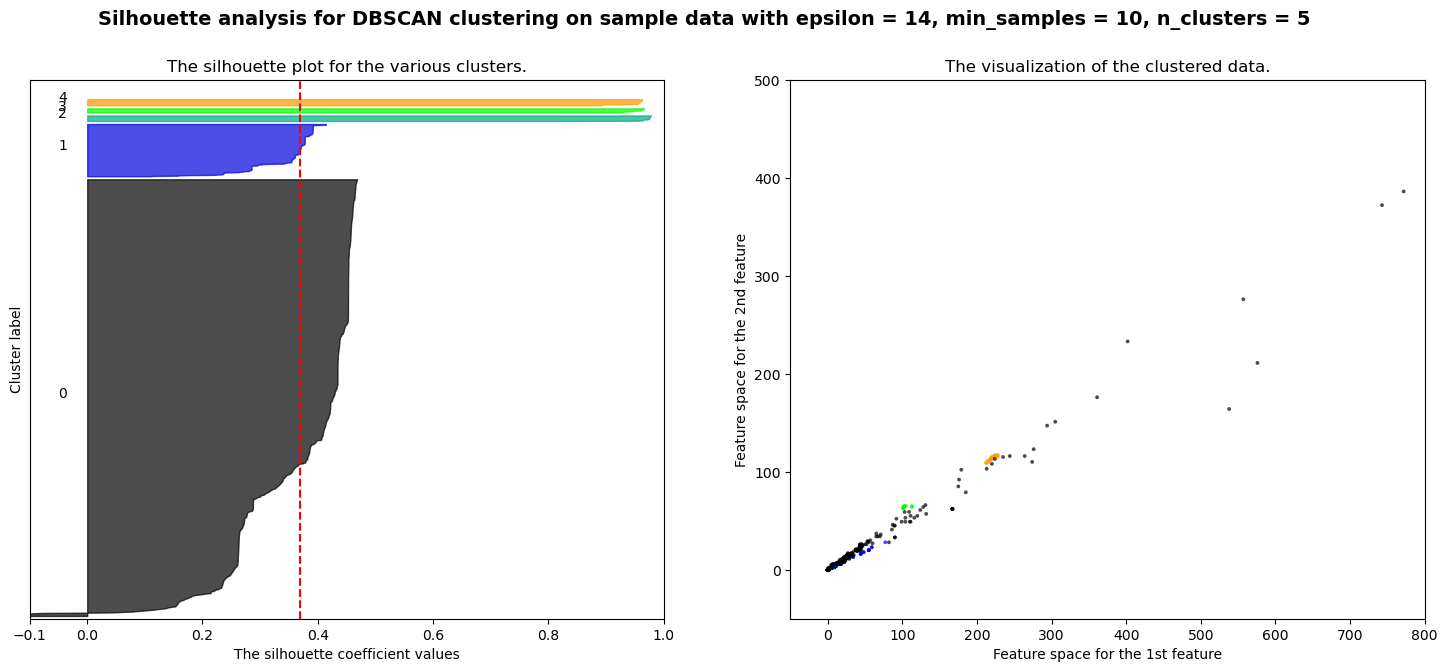

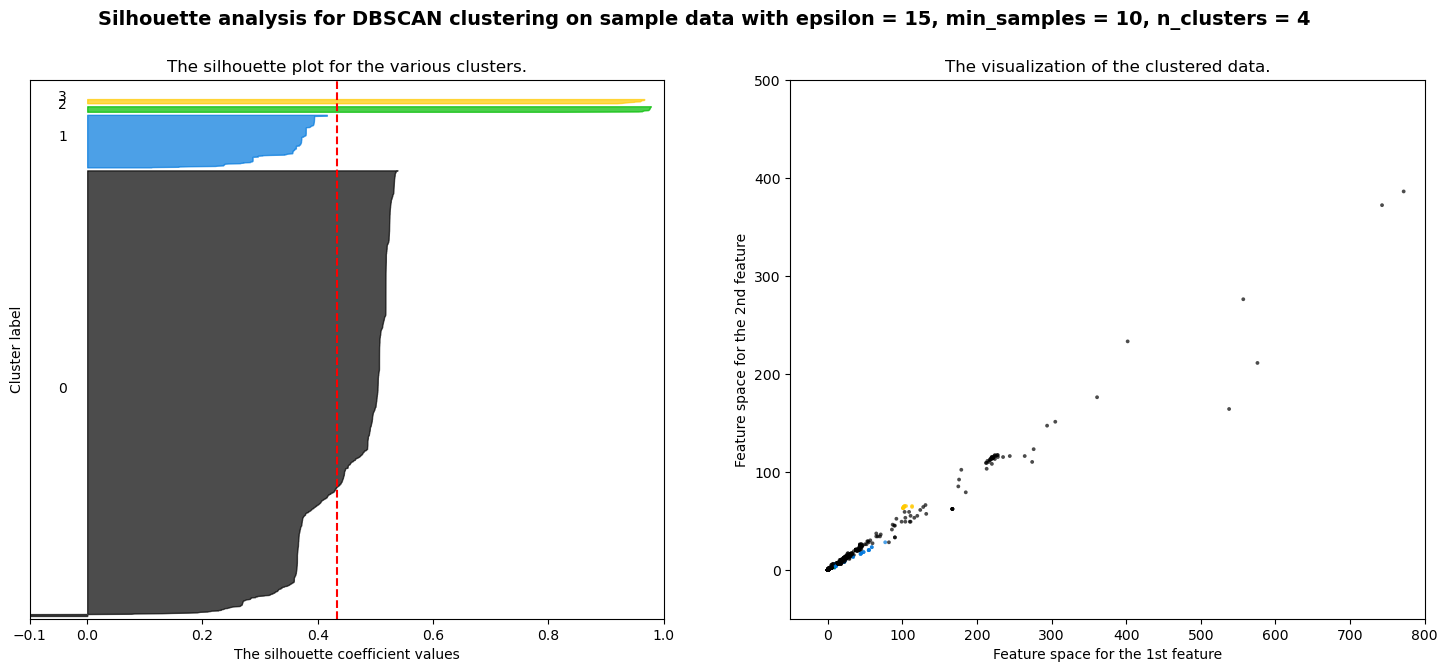

In [22]:
min_samples = 10

for ep in range(2, 16):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    clusterer = DBSCAN(eps=ep, min_samples=min_samples).fit(X_pca)
    cluster_labels = clusterer.fit_predict(X_pca)
    
    labels = clusterer.labels_
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])
    
    silhouette_avg = silhouette_score(X_pca, cluster_labels)
    print(
        "For epsilon =",
        ep,
        'Clusters =',
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X_pca, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    ax2.set_xlim([-50,800])
    ax2.set_ylim([-50,500])
    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for DBSCAN clustering on sample data with epsilon = %d, min_samples = %d, n_clusters = %d"
        % (ep, min_samples, n_clusters),
        fontsize=14,
        fontweight="bold",
    )

plt.show()

In [23]:
y = df['device_category']
X = df.drop('device_category', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.75, random_state = 0)

y_pred = db.fit_predict(X_test)

homogeneity = homogeneity_score(y_test, y_pred)
completeness = completeness_score(y_test, y_pred)

print(f'homogeneity score: {homogeneity}\ncompleteness score: {completeness}')

homogeneity score: 0.20888787483290822
completeness score: 0.5583554083108024


### Gaussian Mixture Model (GMM)

In [24]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.mixture import GaussianMixture as GMM

def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()

    # Calculate the width and height of the ellipse
    v, w = np.linalg.eigh(covariance)
    u = w[0] / np.linalg.norm(w[0])
    angle = np.arctan2(u[1], u[0])
    angle = 180 * angle / np.pi  # convert to degrees
    v *= 9  # to make the ellipse large enough to visualize

    ell = plt.matplotlib.patches.Ellipse(position, v[0], v[1], 180 + angle, **kwargs)
    ell.set_clip_box(ax.bbox)
    ell.set_alpha(0.2)
    ax.add_artist(ell)


def plot_gmm(gmm, X, label=True, ax=None):
    """Plot the GMM clusters"""
    ax = ax or plt.gca()
    labels = gmm.fit(X).predict(X)
    if label:
        ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)
    else:
        ax.scatter(X[:, 0], X[:, 1], s=40, zorder=2)
    ax.axis('equal')

    w_factor = 0.2 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
        draw_ellipse(pos, covar, ax=ax, alpha=w * w_factor)

    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title('GMM Clustering')


# Assuming you have already defined the GMM model (gmm) and the transformed data (X_pca)
plot_gmm(gmm, X_pca)
plt.show()

NameError: name 'gmm' is not defined

### Agglomerative Heirarchical Clustering

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
#import matplotlib.pyplot as plt

# Number of clusters for hierarchical clustering
n_clusters = 6

# Create the Agglomerative Clustering model
agg_clustering = AgglomerativeClustering(n_clusters=n_clusters)

# Fit the model to the transformed features
agg_clustering.fit(X_pca)

# Get the cluster labels for each data point
cluster_labels = agg_clustering.labels_

# Add the cluster labels to the original DataFrame
df['cluster_label'] = cluster_labels

# Calculate linkage matrix for dendrogram visualization
Z = linkage(X_pca, method='ward')

# Plot the dendrogram
plt.figure(figsize=(15, 10))
dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

In [ ]:
y = df['device_category']
X = df.drop('device_category', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.75, random_state = 0)

y_pred = agg_clustering.fit_predict(X_test)

homogeneity = homogeneity_score(y_test, y_pred)
completeness = completeness_score(y_test, y_pred)

print(f'homogeneity score: {homogeneity}\ncompleteness score: {completeness}')

In [ ]:
#import pandas as pd
#import numpy as np
#import matplotlib.pyplot as plt
#from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, OPTICS
#from sklearn.mixture import GaussianMixture
#from sklearn.decomposition import PCA as sklearnPCA
#from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# Load the data from the CSV file
df = pd.read_csv('iot_device.csv')

# Define the list of columns for analysis
# Exclude the last column (assuming it's the target or identifier column)
cols = df.columns[:-1].tolist()

# Select only the columns for analysis
X = df[cols].values

# Check if the selected columns exist in the dataset
if X.shape[1] == 0:
    raise ValueError("No columns were selected for analysis. Please check the 'cols' list.")

# Standardize the data
X_std = StandardScaler().fit_transform(X)

# Perform PCA
n_components = min(X_std.shape[0], X_std.shape[1])
pca = sklearnPCA(n_components=n_components)
X_pca = pca.fit_transform(X_std)

# Range of clusters to try
min_clusters = 3
max_clusters = 10

# Store evaluation metrics for each model and number of clusters
silhouette_scores = []
davies_bouldin_scores = []
calinski_harabasz_scores = []



# Models to evaluate
models = {
    'K-Means': KMeans(),
    'Hierarchical Agglomerative Clustering': AgglomerativeClustering(),
    'Gaussian Mixture Model (GMM)': GaussianMixture(),
    'DBSCAN': DBSCAN(),
    'OPTICS': OPTICS(min_samples=5, xi=0.05, min_cluster_size=0.1),
}

for model_name, model in models.items():
    silhouette_scores_model = []
    davies_bouldin_scores_model = []
    calinski_harabasz_scores_model = []
    
    for n_clusters in range(min_clusters, max_clusters + 1):
        model.n_components = n_clusters  # For GaussianMixture, 'n_components' is equivalent to 'n_clusters'

        # Fit the model to the data
        if model_name in ['K-Means', 'Gaussian Mixture Model (GMM)']:
            model.fit(X_std)
        else:
            model.fit(X_std)  # Re-fit the AgglomerativeClustering for each n_clusters

        # Get the cluster labels
        if model_name in ['DBSCAN', 'OPTICS']:
            labels = model.labels_
        elif model_name == 'Gaussian Mixture Model (GMM)':
            labels = model.predict(X_std)  # Use 'predict' for GaussianMixture
        else:
            labels = model.labels_  # Use the 'labels_' attribute for AgglomerativeClustering

        # Calculate evaluation metrics
        silhouette_scores_model.append(silhouette_score(X_std, labels))
        davies_bouldin_scores_model.append(davies_bouldin_score(X_std, labels))
        calinski_harabasz_scores_model.append(calinski_harabasz_score(X_std, labels))

    silhouette_scores.append(silhouette_scores_model)
    davies_bouldin_scores.append(davies_bouldin_scores_model)
    calinski_harabasz_scores.append(calinski_harabasz_scores_model)





# Plot Silhouette Scores vs. Number of Clusters for each model
plt.figure(figsize=(10, 6))
for model_name, scores in zip(models.keys(), silhouette_scores):
    plt.plot(range(min_clusters, max_clusters + 1), scores, marker='o', label=model_name)

plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score vs. Number of Clusters")
plt.legend(loc='best')
plt.grid()
plt.show()

# Plot Davies-Bouldin Index vs. Number of Clusters for each model
plt.figure(figsize=(10, 6))
for model_name, scores in zip(models.keys(), davies_bouldin_scores):
    plt.plot(range(min_clusters, max_clusters + 1), scores, marker='o', label=model_name)

plt.xlabel("Number of Clusters")
plt.ylabel("Davies-Bouldin Index")
plt.title("Davies-Bouldin Index vs. Number of Clusters")
plt.legend(loc='best')
plt.grid()
plt.show()

# Plot Calinski-Harabasz Index vs. Number of Clusters for each model
plt.figure(figsize=(10, 6))
for model_name, scores in zip(models.keys(), calinski_harabasz_scores):
    plt.plot(range(min_clusters, max_clusters + 1), scores, marker='o', label=model_name)

plt.xlabel("Number of Clusters")
plt.ylabel("Calinski-Harabasz Index")
plt.title("Calinski-Harabasz Index vs. Number of Clusters")
plt.legend(loc='best')
plt.grid()
plt.show()